# n-widths for transport problems 
## Heaviside step function
$u(x;\mu) = f(x, \mu) = \begin{cases}
    0.0 & \text{if $x < \mu $} \\
    0.5 & \text{if $x = \mu $} \\
    1.0 & \text{if $x > \mu $}
  \end{cases}$ 
  
  $ x \in ({0,1})$ and $ \mu \in ({0,1})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.plasma

In [2]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Trigonometric2, TrigonometricAll, Greedy, LNA, LPF, Sinc

We need to set some boring plotting options...:

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
#mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')

8.030570172000001


In [4]:
def plot_modes(x, X, r=10):
    for i in range(r):
        print(i, r, i/r)
        plt.plot(x, X[:, i], "o", ms=1, color=cmap(i/(r-1)), label="mode {:.0f}".format(i))
    plt.xlim([0, 1])
    plt.grid(which="both")
    return


def plot_singular_values(S):
    S = S/S[0].copy()  # normalize singular values to make for a better comparison!
    fig, ax1 = plt.subplots()
    ax1.plot(np.arange(1, len(S)+1), S, "k.", ms=1)
    ax1.set_xlabel("order")
    ax1.set_ylabel("singular value")
    ax1.set_yscale('log')
    ax1.set_xlim([0, len(S)])
    ax1.set_ylim([1e-6, 100])
    ax1.grid(which="both")
    plt.tight_layout()
    return None


def plot_error(rms_error, max_error):
    fig, ax = plt.subplots()
    ax.plot(max_error, ".", label="max_error")
    ax.plot(rms_error, ".", label="rms_error")
    ax.set_yscale('log')
    plt.legend(prop={'size': 8})
    return ax

In [5]:
m, n, r = 2000, 2000, 500
#m, n, r = 100*4, 100*4, 50*4
#m, n, r = 500, 250, 250
x = Domain([0, 1], m)
mu = Domain([0, 1], n)
#x.x = np.linspace(0, 1, m+1, endpoint=True)
#mu.x = np.linspace(0, 1, m+1, endpoint=True)

[0.000e+00 5.000e-04 1.000e-03 ... 9.985e-01 9.990e-01 9.995e-01]
1000 6286.326899833176 6283.185307179586
(2000, 2000)


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


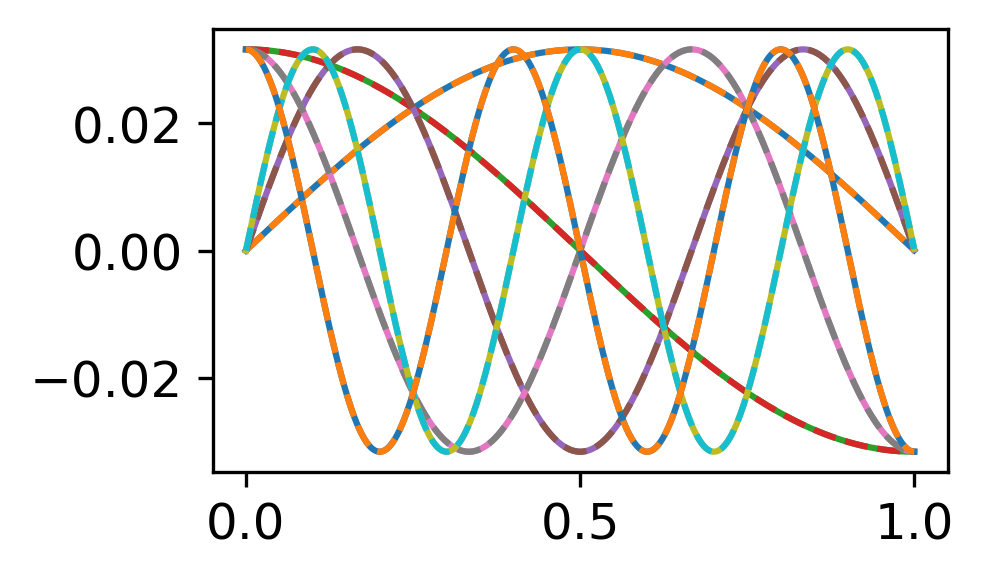

-9.694328673148789e-14 1.000000000000004


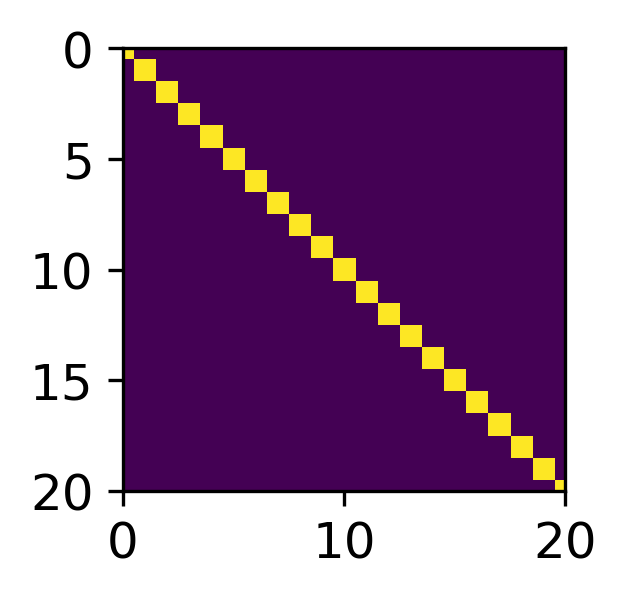

-1.2522621828381375e-13 1.0000000000000007


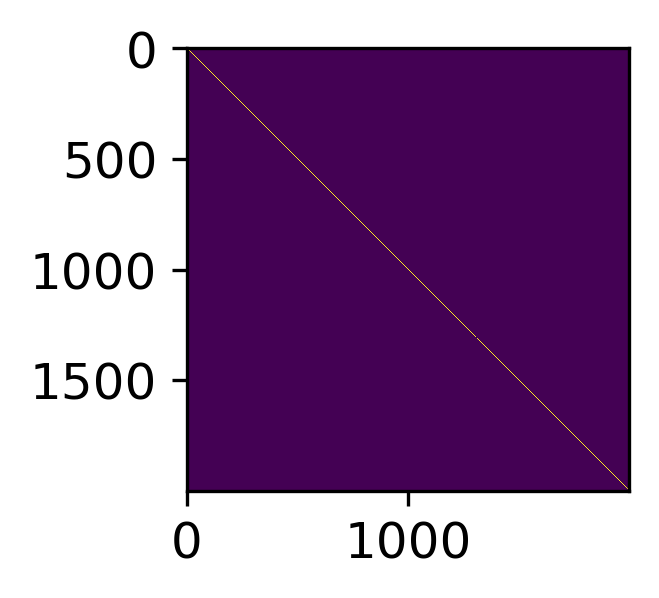

In [6]:
print(x()-x()[0])
trig_basisa = TrigonometricAll(x()-x()[0])

U = trig_basisa.U
print(U.shape)
Uo, R = np.linalg.qr(U)
for i in range(6):
    plt.plot(x(), U[:, i])
    plt.plot(x(), -Uo[:, i], "--")
plt.show()

p = (U.T@U)
print(p.min(), p.max())
fig, ax = plt.subplots()
plt.imshow(p, interpolation="nearest")
plt.xlim([0, 20])
plt.ylim([20, 0])
plt.show()

p = (U@U.T)
print(p.min(), p.max())
fig, ax = plt.subplots()
plt.imshow(p, interpolation="nearest")
plt.show()

heaviside


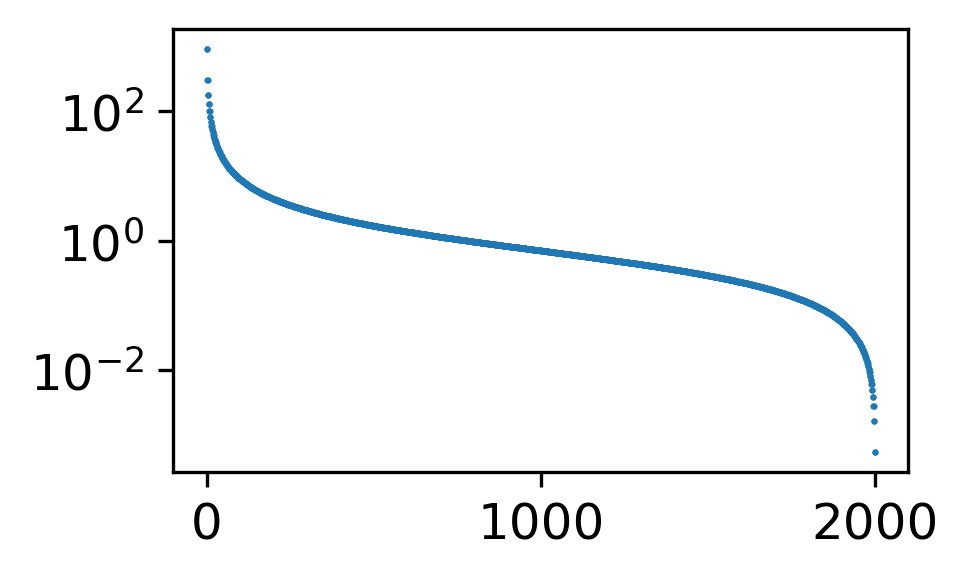

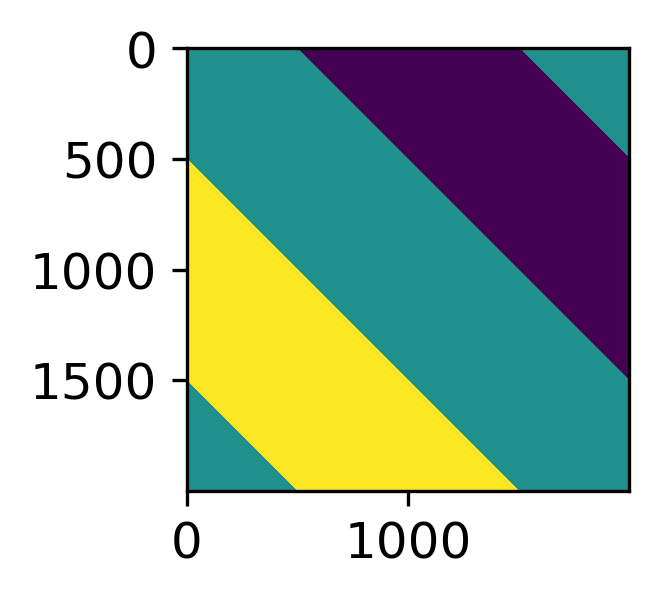

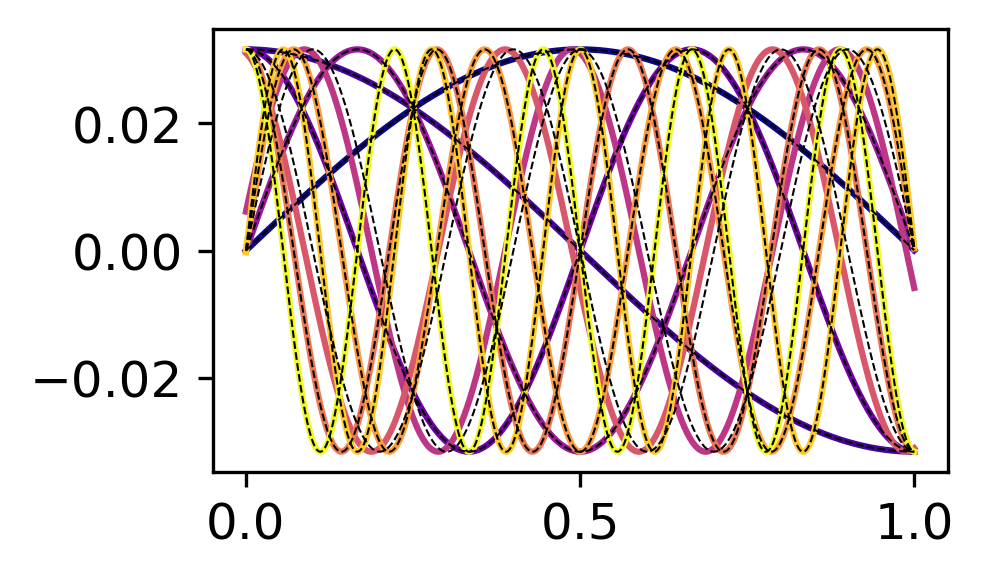

generating greedy basis. rank: 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


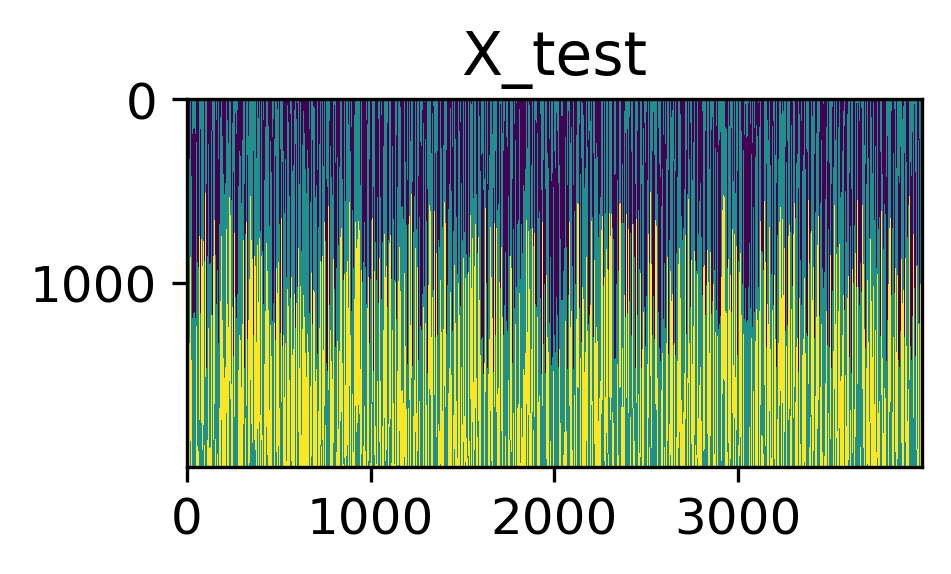

svd
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
sinc
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 48

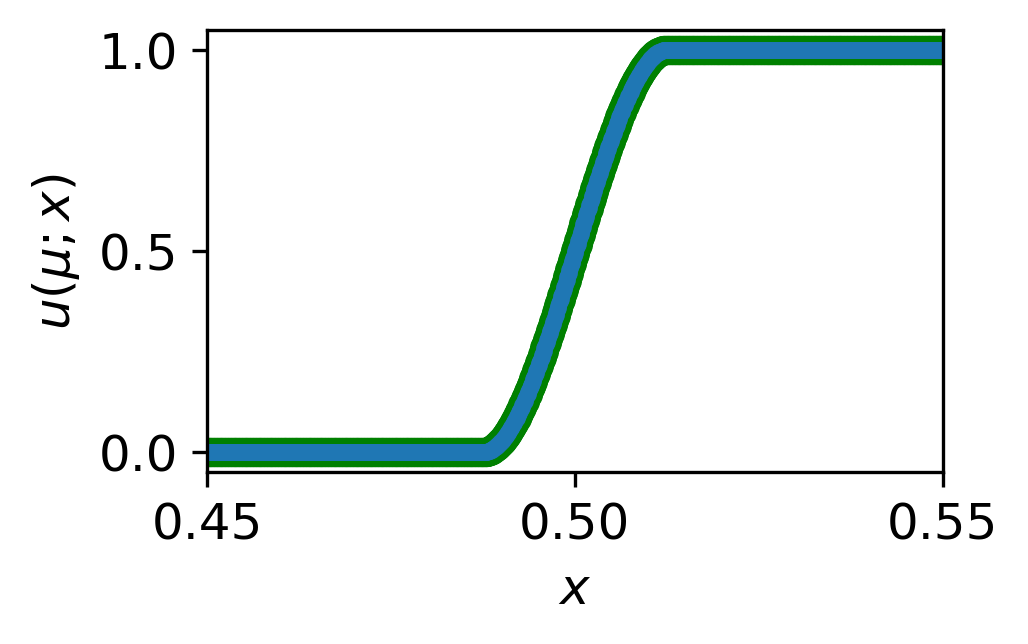

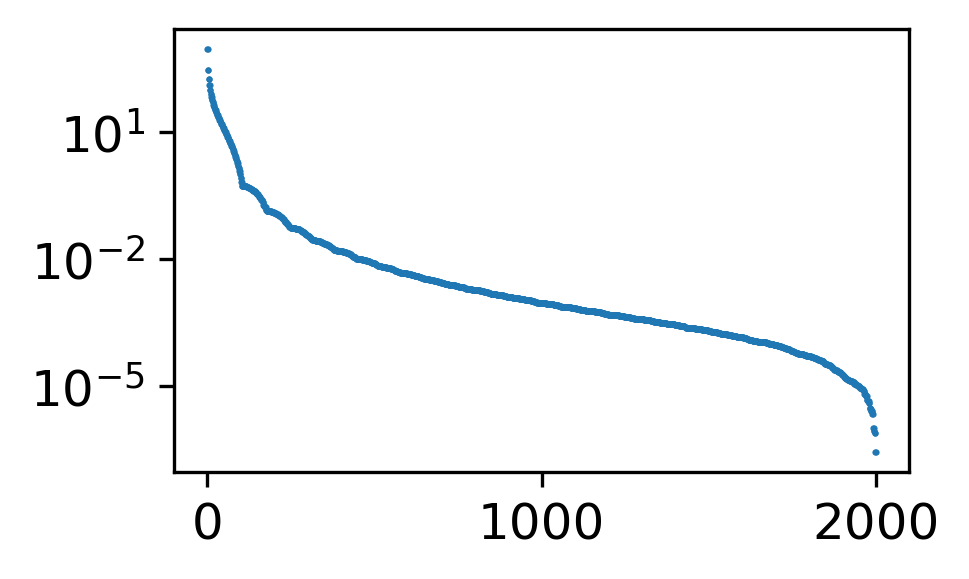

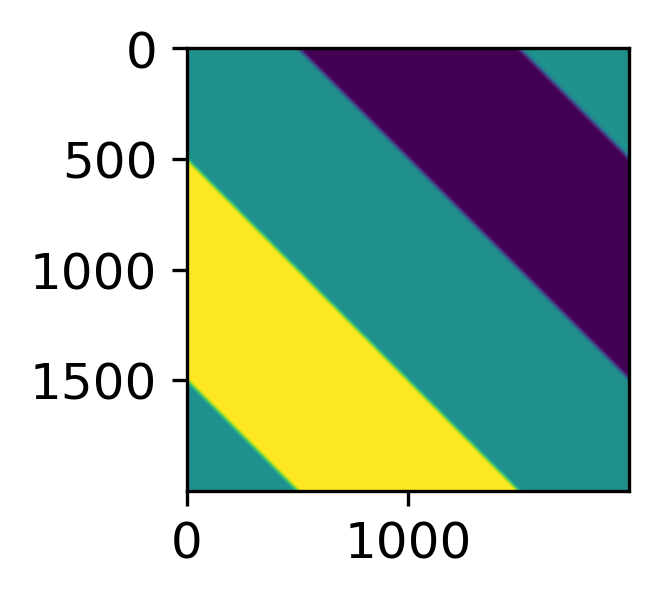

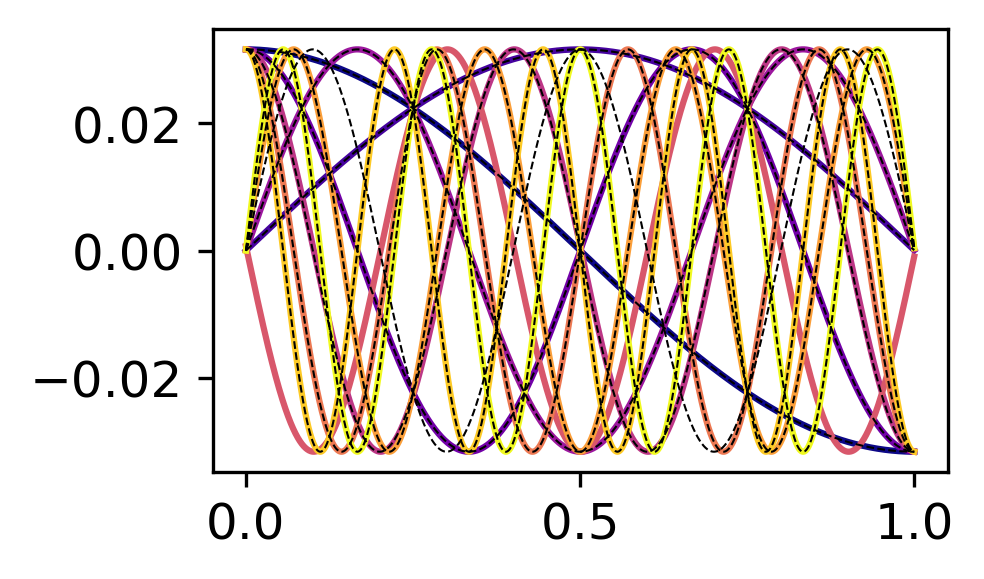

generating greedy basis. rank: 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215

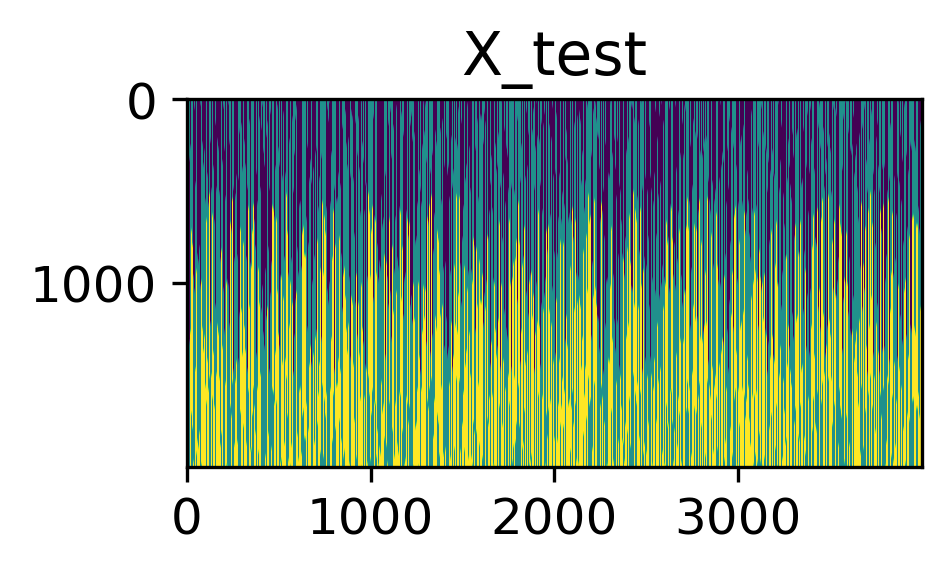

svd
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
sinc
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 48

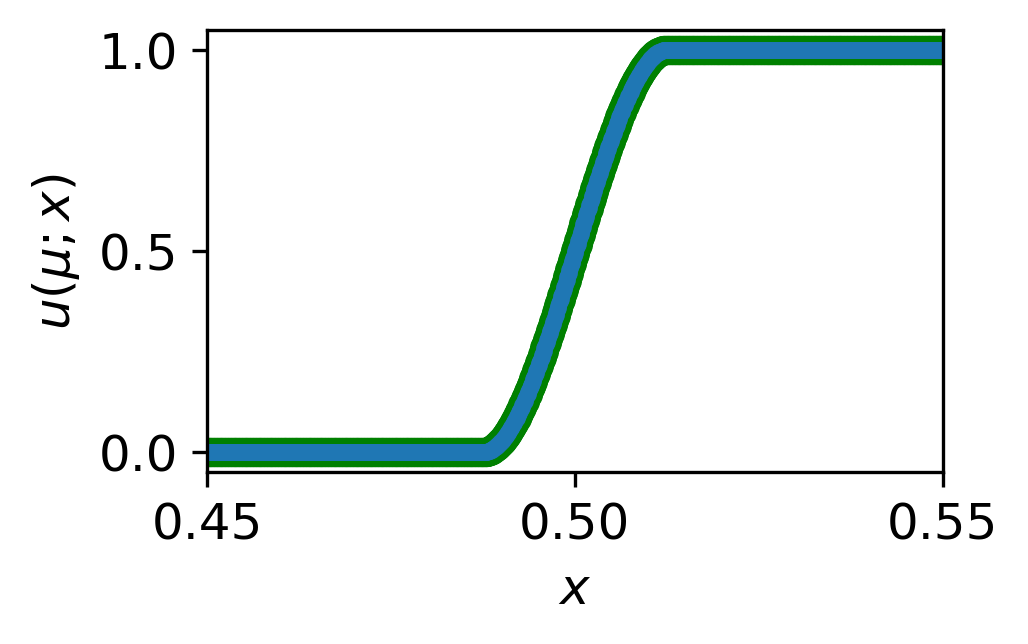

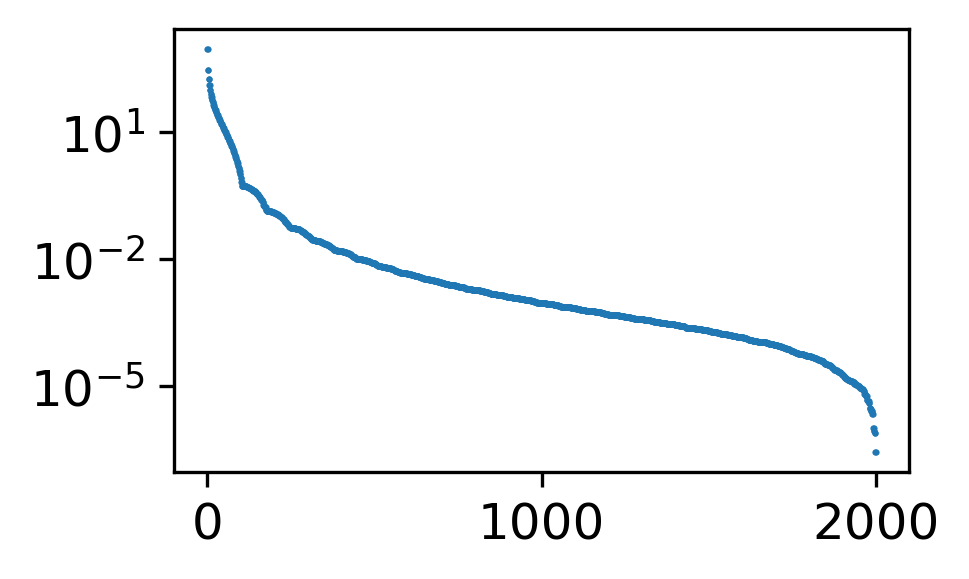

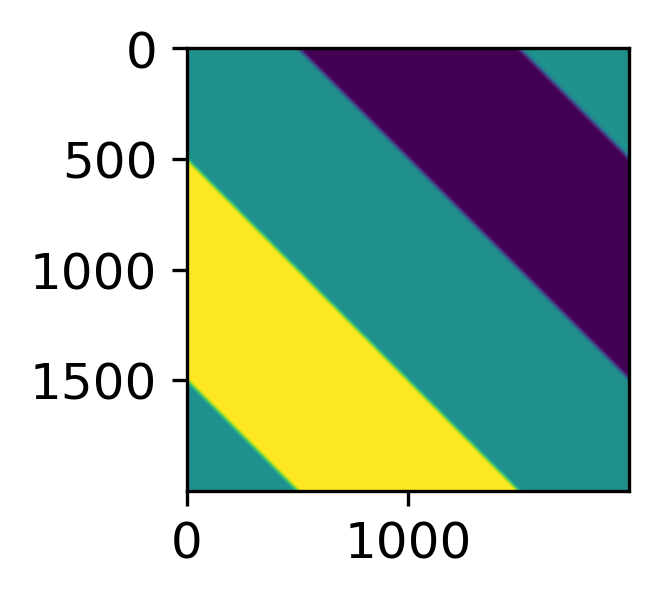

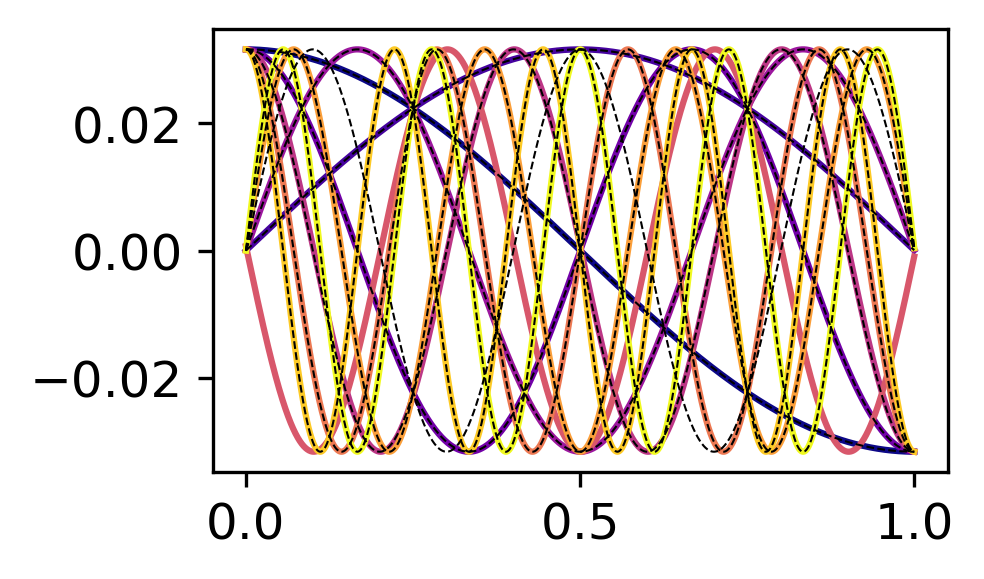

generating greedy basis. rank: 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215

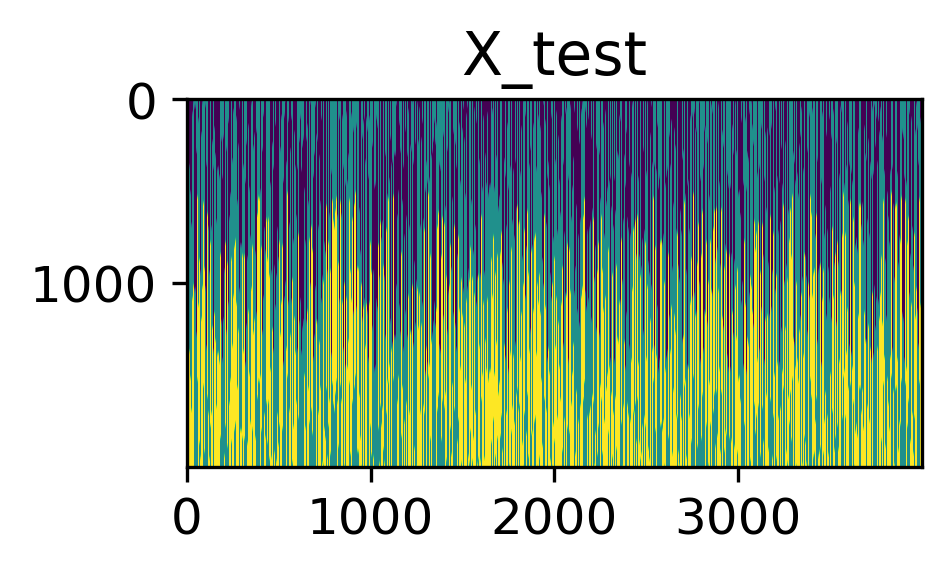

svd
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
sinc
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 48

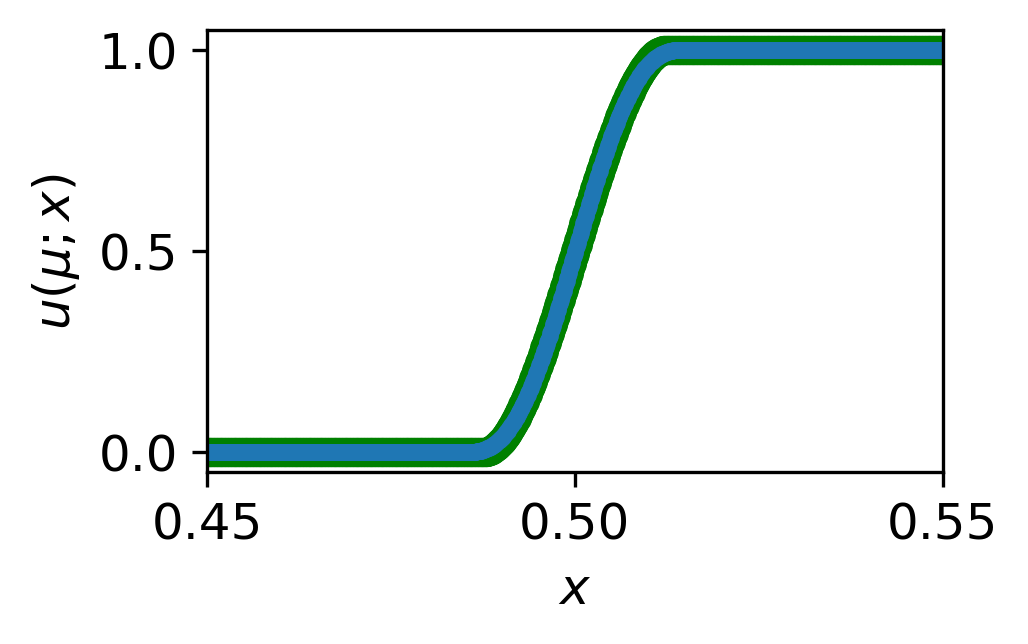

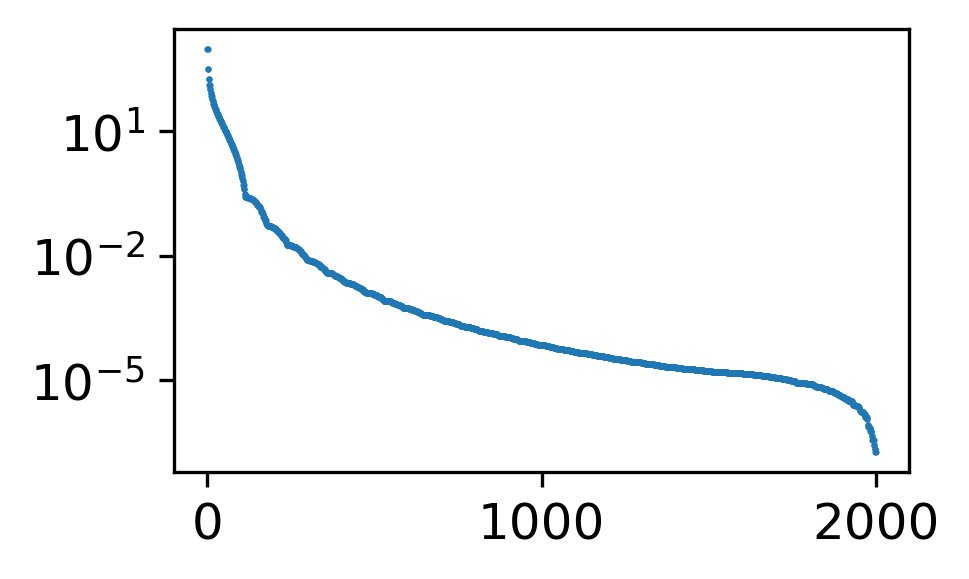

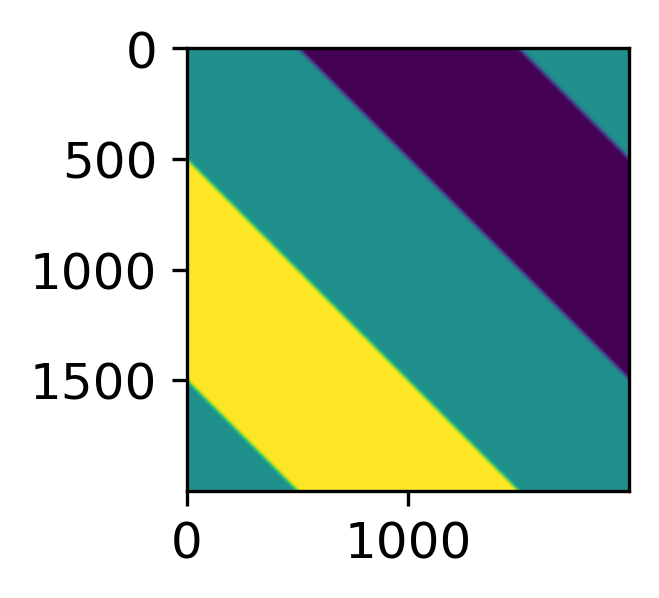

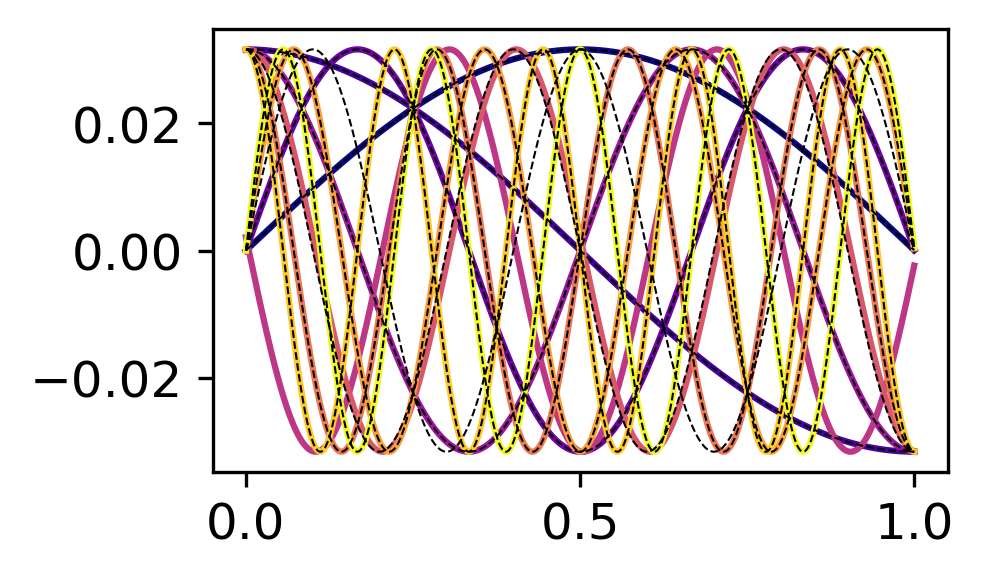

generating greedy basis. rank: 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215

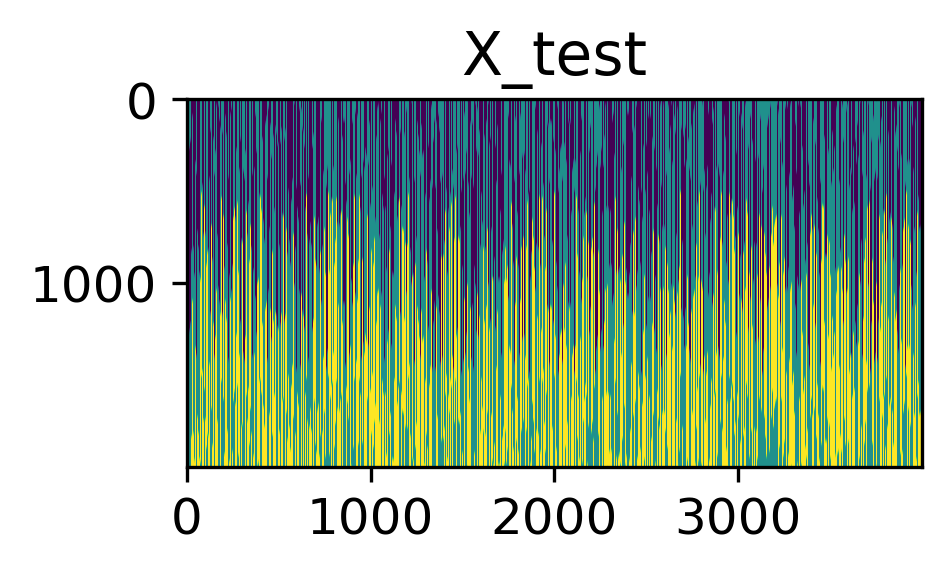

svd
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
sinc
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 48

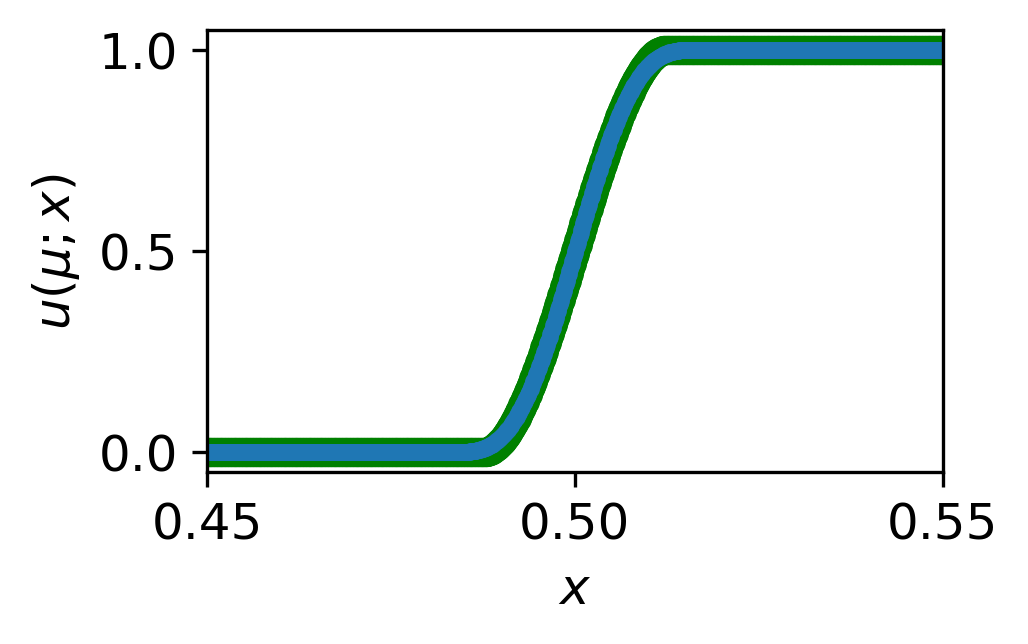

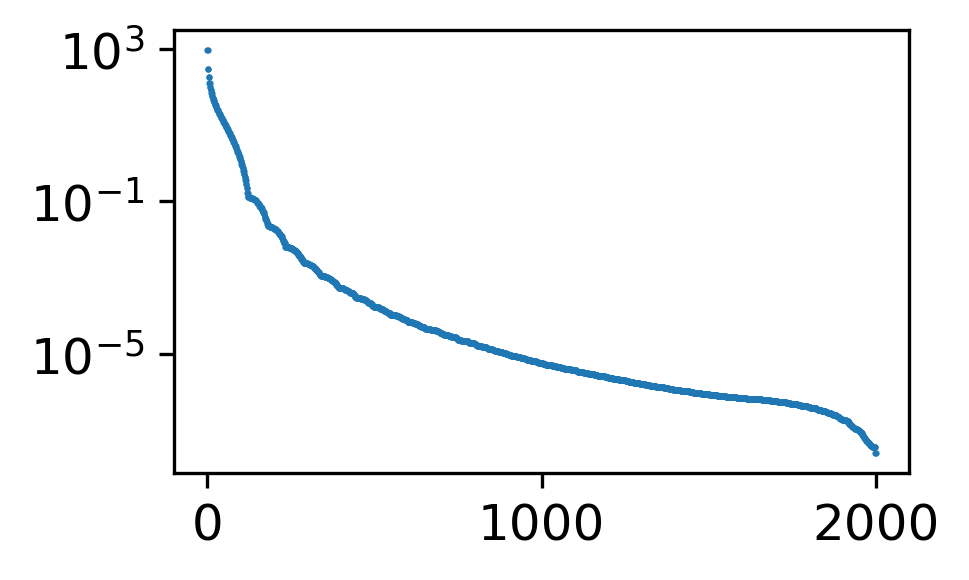

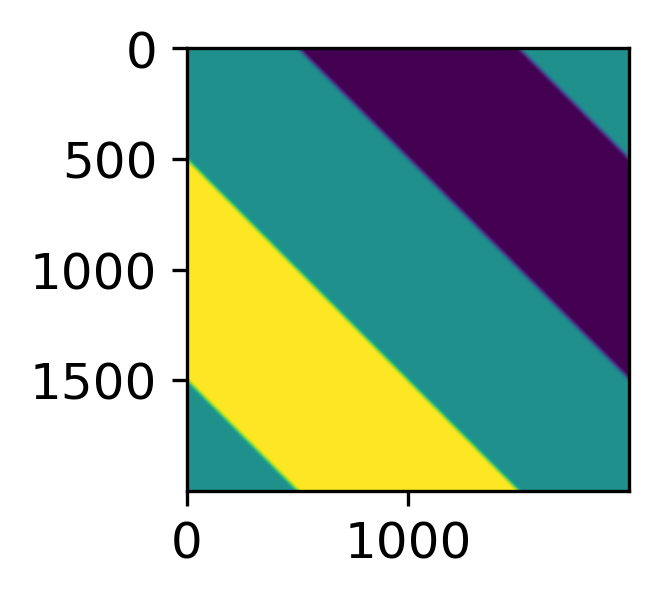

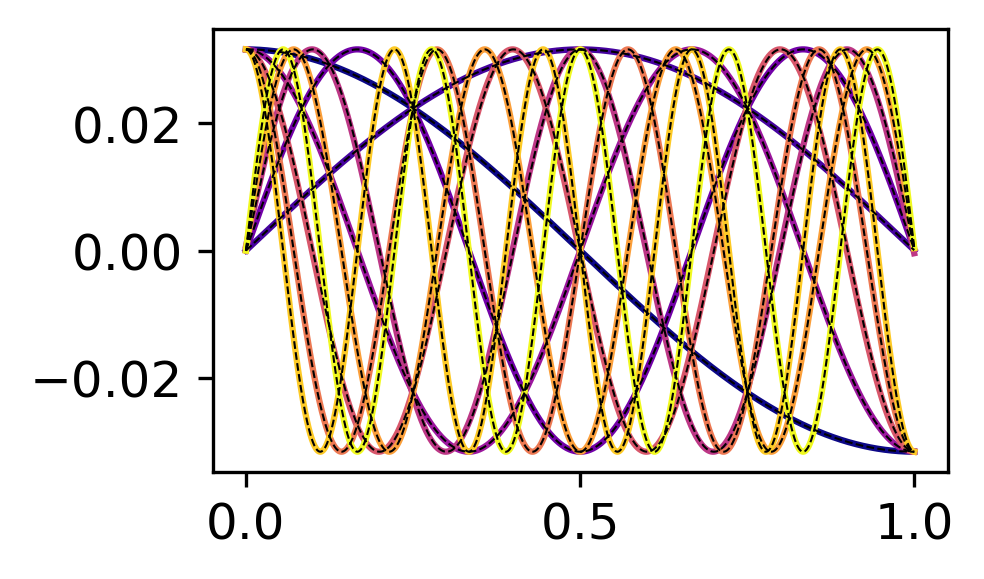

generating greedy basis. rank: 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215

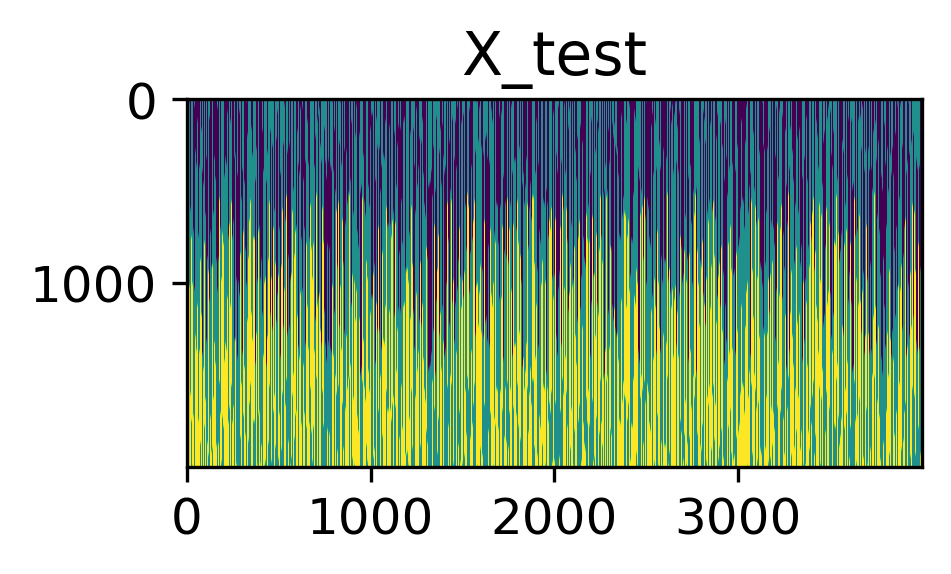

svd
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
sinc
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 48

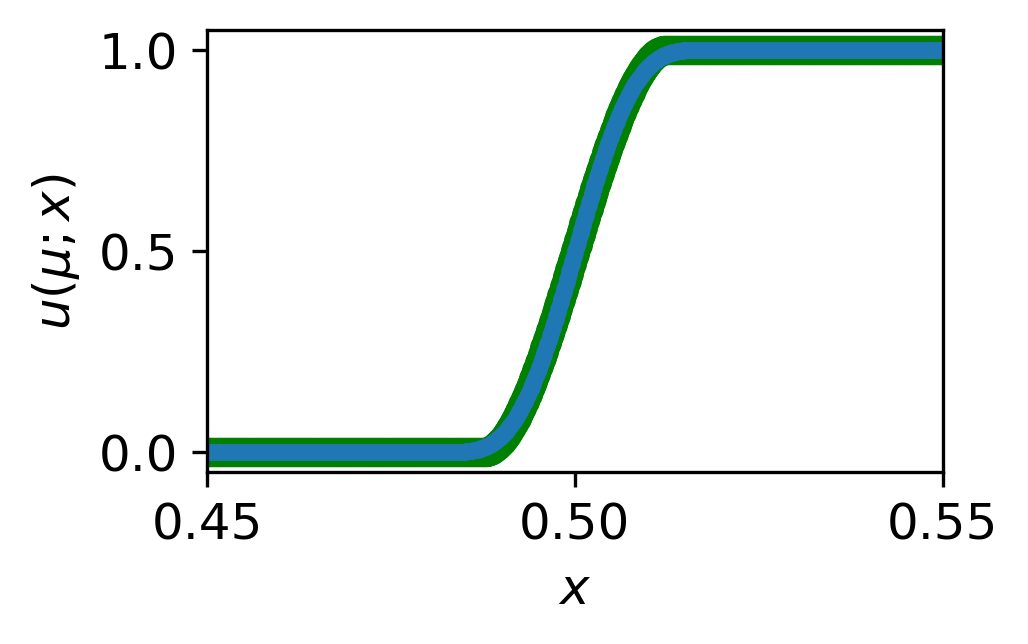

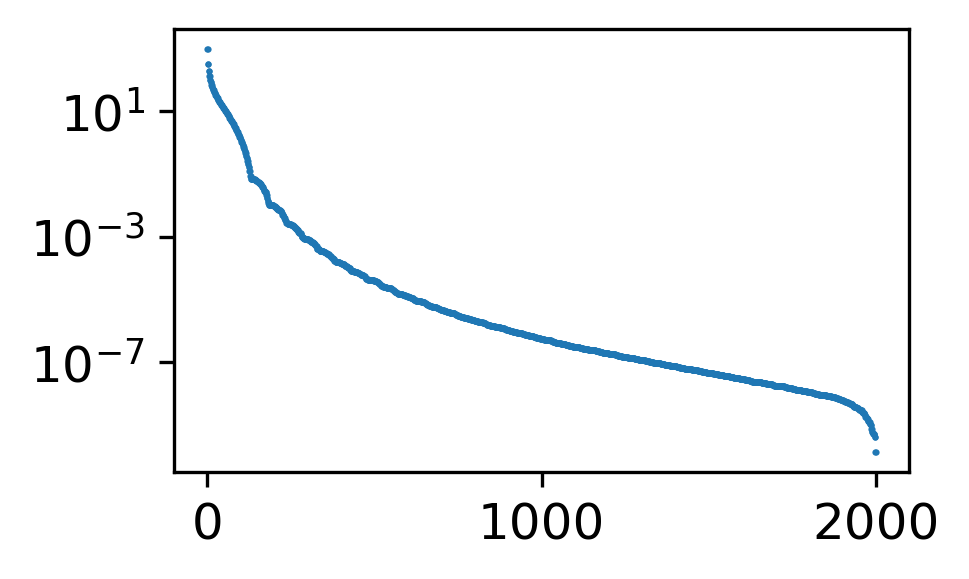

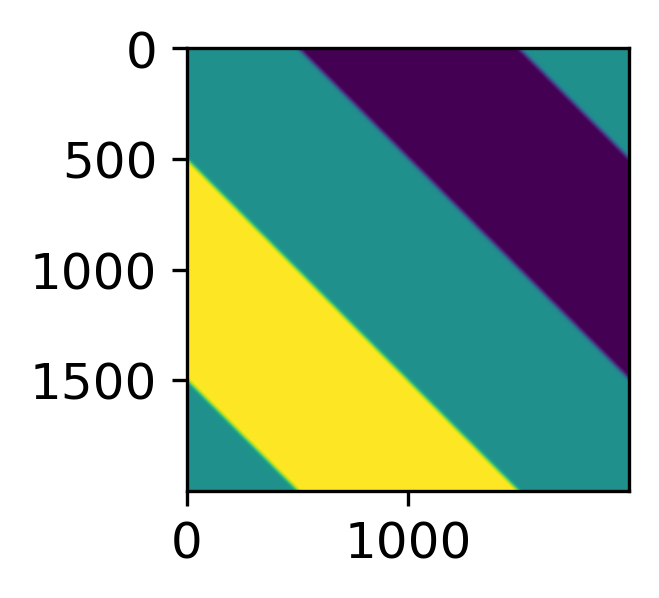

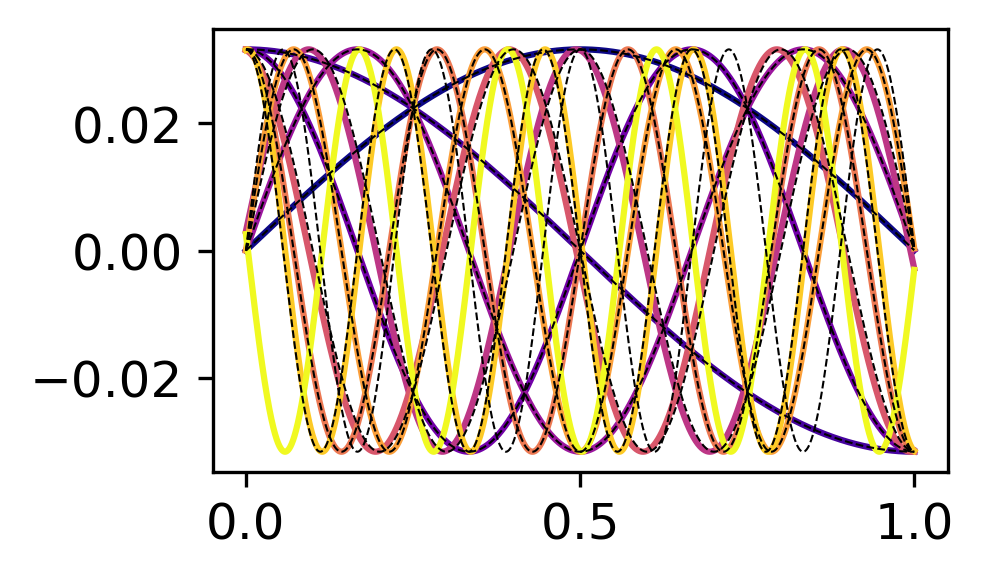

generating greedy basis. rank: 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215

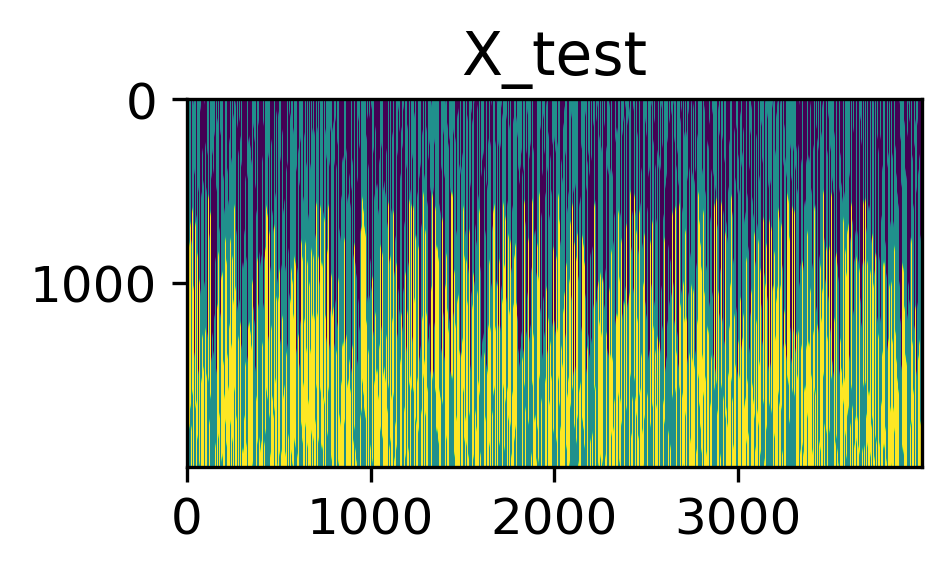

svd
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
sinc
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 48

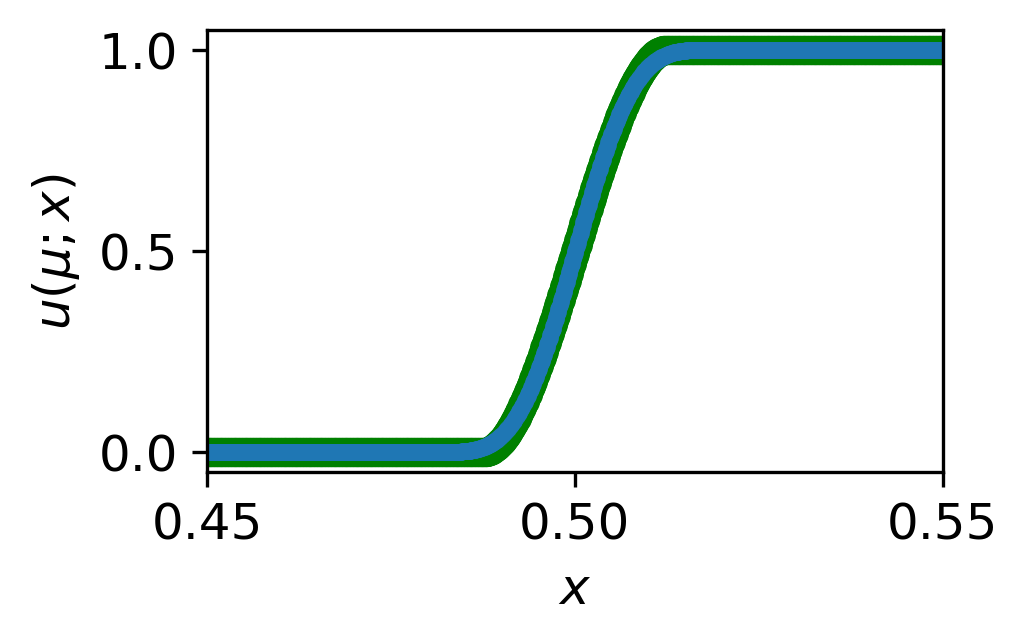

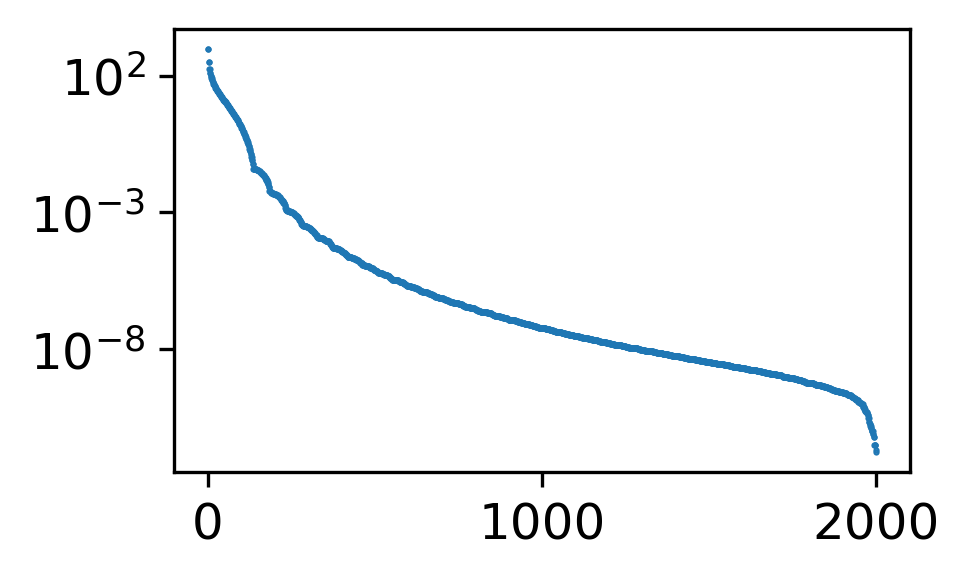

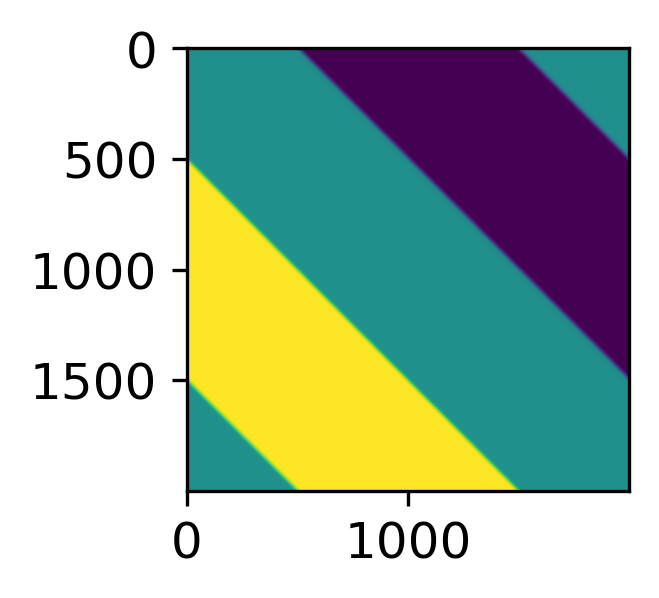

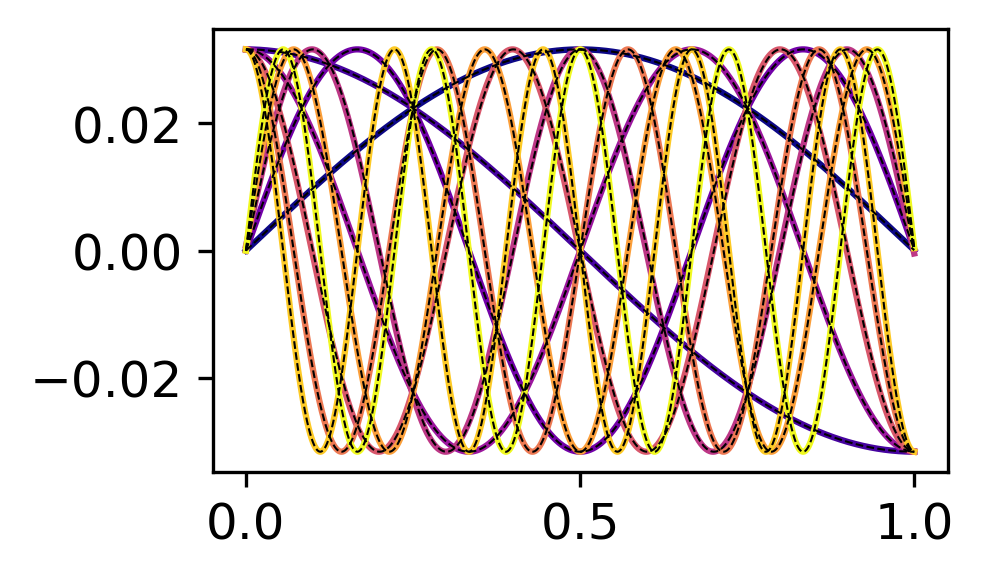

generating greedy basis. rank: 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215

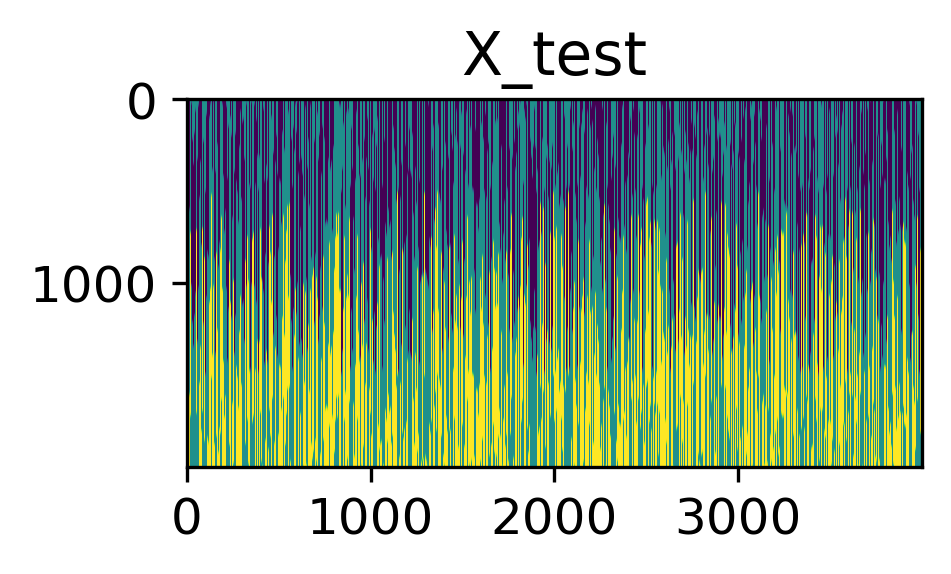

svd
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
sinc
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 48

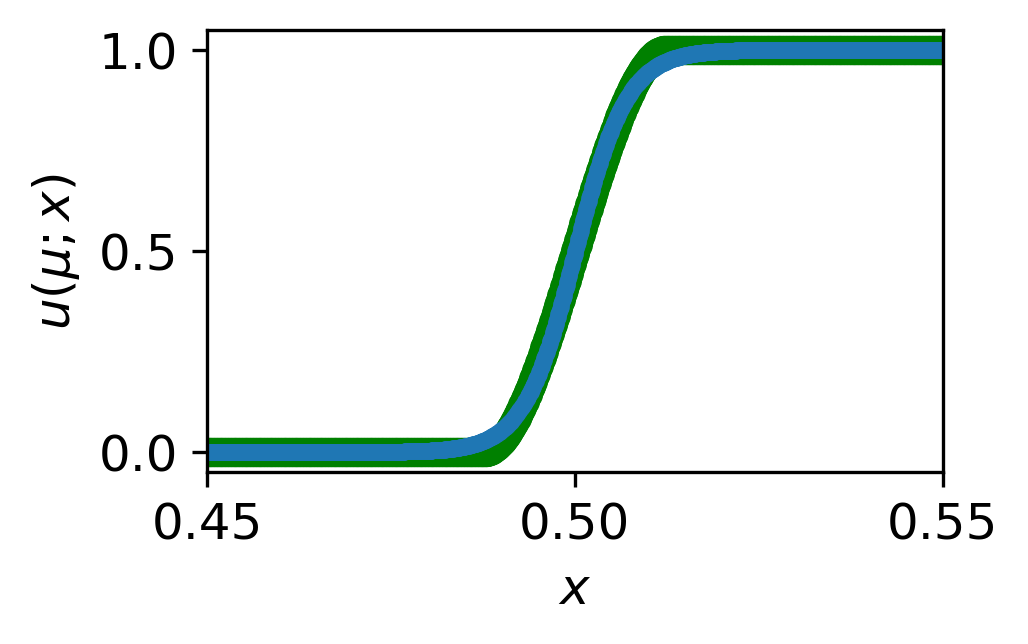

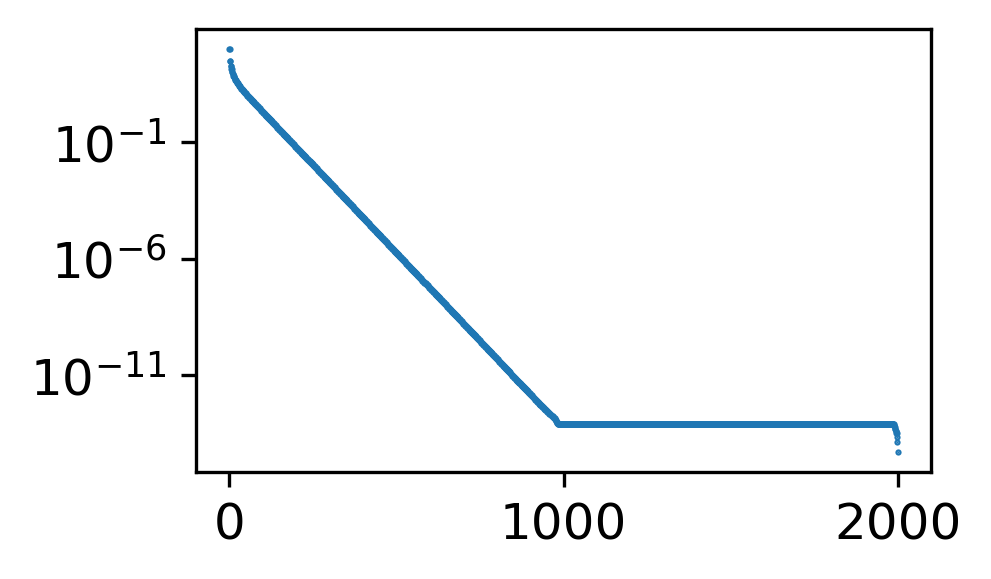

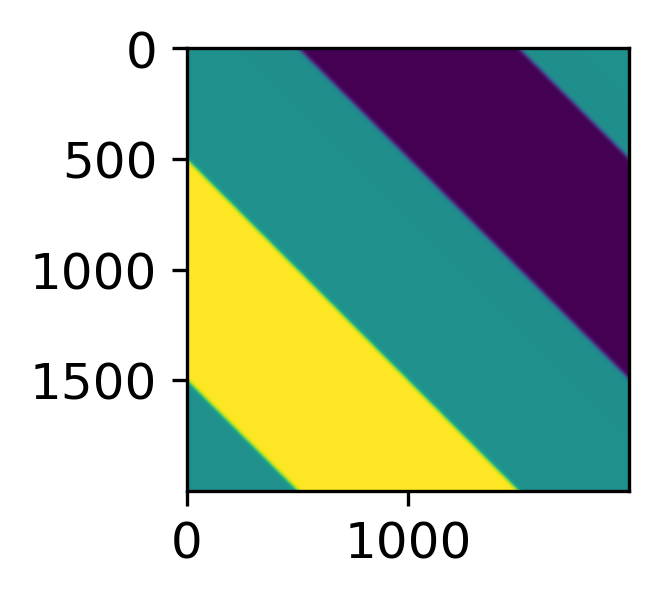

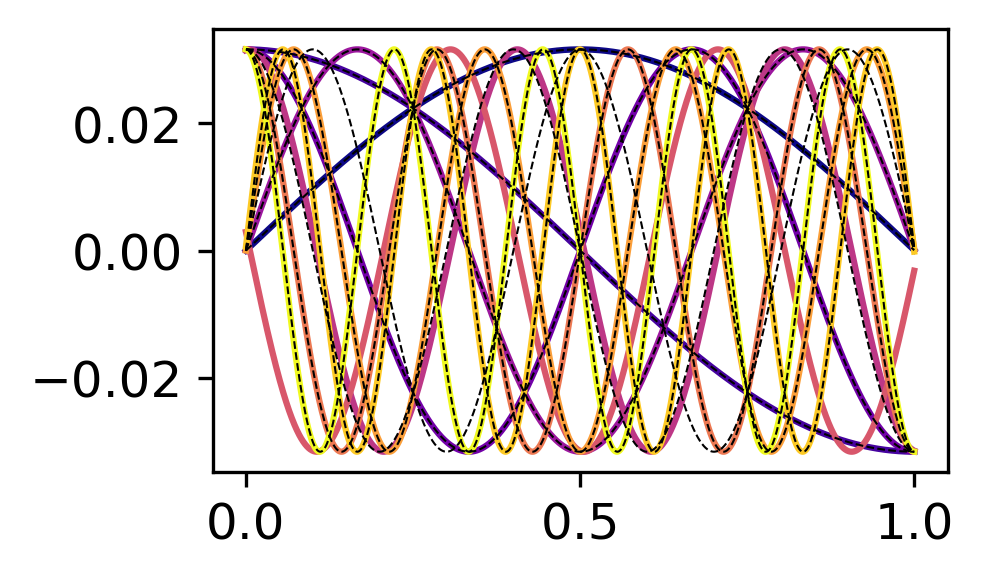

generating greedy basis. rank: 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215

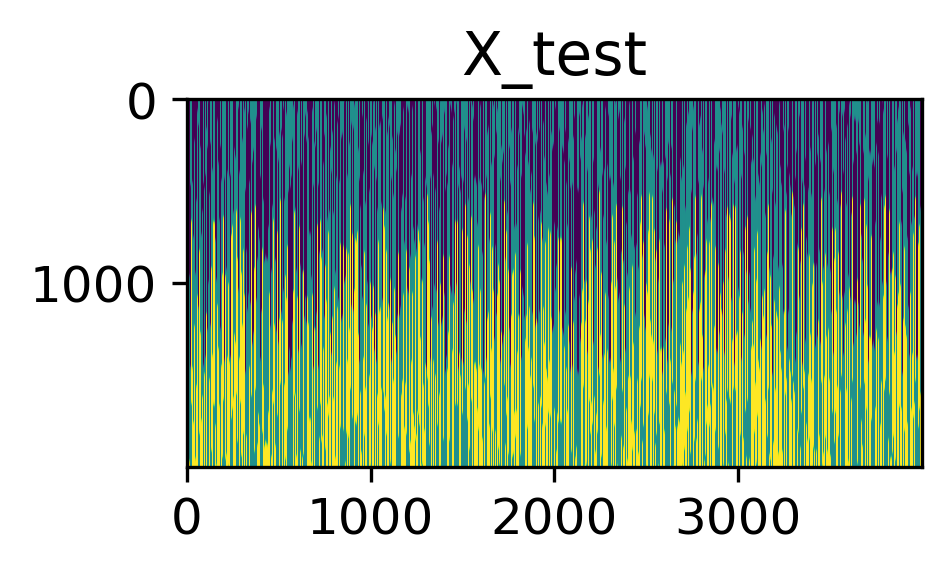

svd
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 481, 486, 491, 496, 
sinc
calc_error: 2000 4000 500
1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451, 456, 461, 466, 471, 476, 48

In [7]:
#initc = [u_hs, u_lr, u_sr, u_C1, u_C2, u_C3, u_C4, u_C5, u_sg]
#basis = [svd_basis, trig_basis, greedy_basis, lna_basis, lpf_basis]
# 9 ic
# 5 bv
# 4 errors
# r entries

results = np.zeros((6, 9, 4, r))
epsilon = 0.025
u_hs = Heaviside()
#u_lr = LinearRamp(epsilon)
#u_sr = SmoothRamp(epsilon)
u_C0 = CkRamp(epsilon, 1)
u_C1 = CkRamp(epsilon, 1)
u_C2 = CkRamp(epsilon, 2)
u_C3 = CkRamp(epsilon, 3)
u_C4 = CkRamp(epsilon, 4)
u_C5 = CkRamp(epsilon, 5)
u_sg = Sigmoid(1/epsilon)

tt = np.linspace(0, 1, 10000)
results_path = "C:/Users/florianma/Dropbox/Kol-N-width-Oslo-Ulm/n_widths_for_transport/results/hvo_"
initc = [u_hs, u_C0, u_C1, u_C2, u_C3, u_C4, u_C5, u_sg]
#initc = [u_hs, u_lr, u_C5, u_sg]
for j, u_k in enumerate(initc):  # 9
    print(u_k.name)
    u_k.fit_to(u_C0, tt)
    X = u_k.half_wave_odd(x(), mu())
    X = X

    svd_basis = SVD(X)
    u_k.S = svd_basis.S
    U = svd_basis.U

    fig, ax = plt.subplots()
    ax.plot(u_k.S, ".", ms=1)
    ax.set_yscale('log')
    plt.show()

    fig, ax = plt.subplots()
    plt.imshow(X, interpolation="none", vmin=-1, vmax=1)
    plt.show()
    
    fig, ax = plt.subplots()
    for i in range(10):
        plt.plot(x(), U[:, i], color=cmap(i/(10-1)), zorder=1)
        plt.plot(x(), trig_basisa.U[:, i], "k--", zorder=2, lw=.5)
    #plt.xlim([0, 0.1])
    plt.show()

    sinc_basis = Sinc(x)
    greedy_basis = Greedy(X, r=r)
    lna_basis = LNA(u_k, x)
    lpf_basis = LPF(x)

#    mu_test = Domain([mu.min, mu.max], n*10)()
    mu_test = np.random.rand(n*2,)
    X_test = u_k.half_wave_odd(x(), mu_test)
    fig, ax = plt.subplots()
    plt.imshow(X_test, interpolation="none", vmin=-1, vmax=1)
    plt.title("X_test")
    plt.show()
    basis_all = [svd_basis, sinc_basis, trig_basisa, greedy_basis, lna_basis, lpf_basis]
    #basis_all = [svd_basis, trig_basisa]
    for i, basis in enumerate(basis_all):  # 6
        print(basis.name)
        delta_n, d_n = basis.calc_error(X_test, r)
        results[i, j, 0, :] = delta_n
        results[i, j, 1, :] = d_n

        np.save(results_path+"_delta_n_"+basis.name+"_"+u_k.name+".npy", delta_n)
        np.save(results_path+"_d_n_"+basis.name+"_"+u_k.name+".npy", d_n)

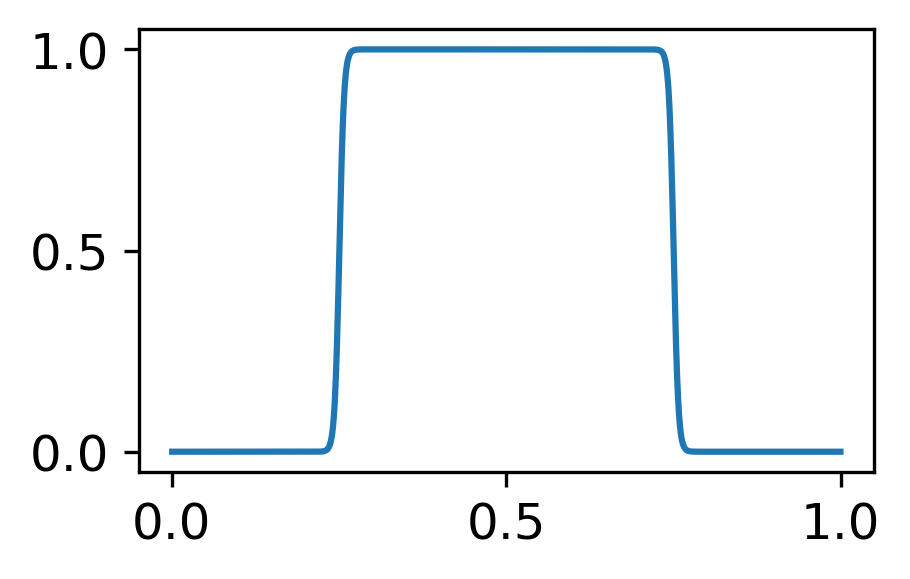

In [8]:
fig, ax = plt.subplots()
ax.plot(x(), X[:, 0])
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025


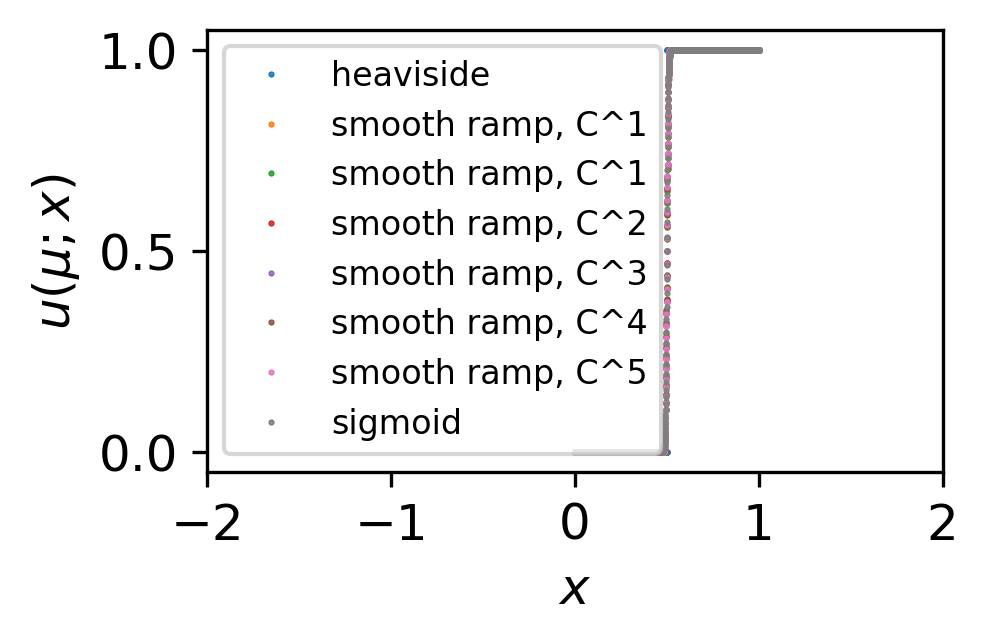

mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025


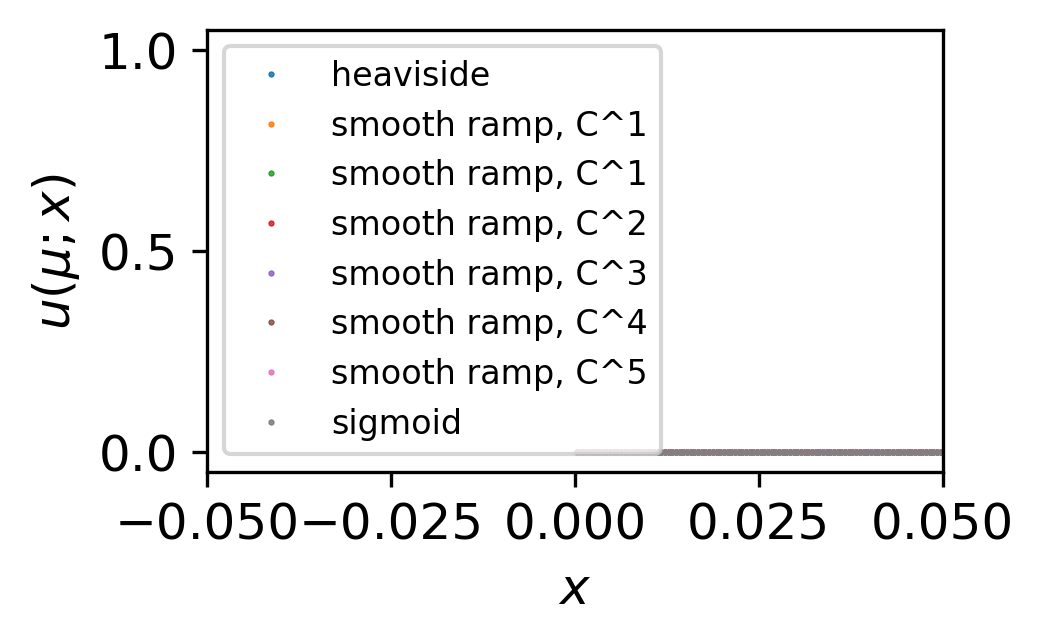

mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025
mu_test =  0.50025


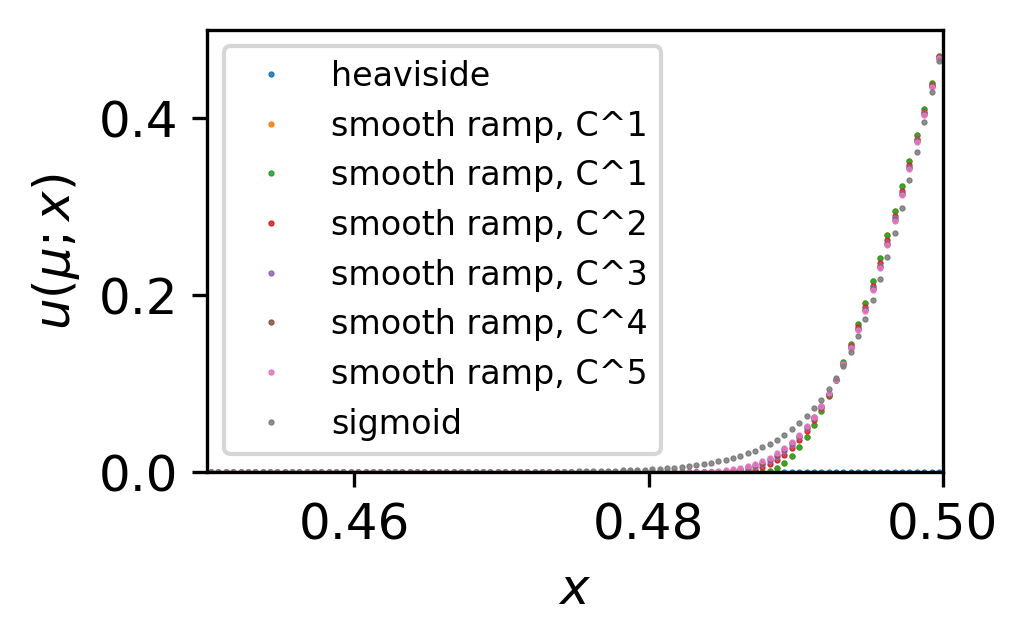

In [9]:
fig, ax = plt.subplots()
for i, ic in enumerate(initc):
    ic.plot(x(), ax=ax, ms=1, label=ic.name)
plt.xlim(-2, 2)
plt.legend(prop={'size': 8})
plt.show()

fig, ax = plt.subplots()
for i, ic in enumerate(initc):
    ic.plot(x(), ax=ax, ms=1, label=ic.name)
plt.xlim(-.05, .05)
plt.legend(prop={'size': 8})
plt.show()

fig, ax = plt.subplots()
for i, ic in enumerate(initc):
    ic.plot(x(), ax=ax, ms=1, label=ic.name)
plt.xlim(.45, .5)
plt.ylim(.0, .5)
plt.legend(prop={'size': 8})
plt.show()

In [10]:
from enum import Enum

basis_types = { "svd": 0,
                "sinc": 1,
                "trigonometric": 2,
                "greedy": 3,
                "local neighbours average": 4,
                "local pulse functions": 5}
initial_conditions = {  "heaviside": 0,
                        "linear ramp": 1,
                        "smooth ramp": 2,
                        "smooth ramp, C^1": 3,
                        "smooth ramp, C^2": 4,
                        "smooth ramp, C^3": 5,
                        "smooth ramp, C^4": 6,
                        "smooth ramp, C^5": 7,
                        "sigmoid": 8,}
for j, ic in enumerate(initc):
    print(ic.name)
for i, bv in enumerate(basis_all):
    print(bv.name)

heaviside
smooth ramp, C^1
smooth ramp, C^1
smooth ramp, C^2
smooth ramp, C^3
smooth ramp, C^4
smooth ramp, C^5
sigmoid
svd
sinc
trigonometric_all
greedy
local neighbours average
local pulse functions


heaviside
$heaviside$
$\int_E_n(u(\mu;x)) d\mu$


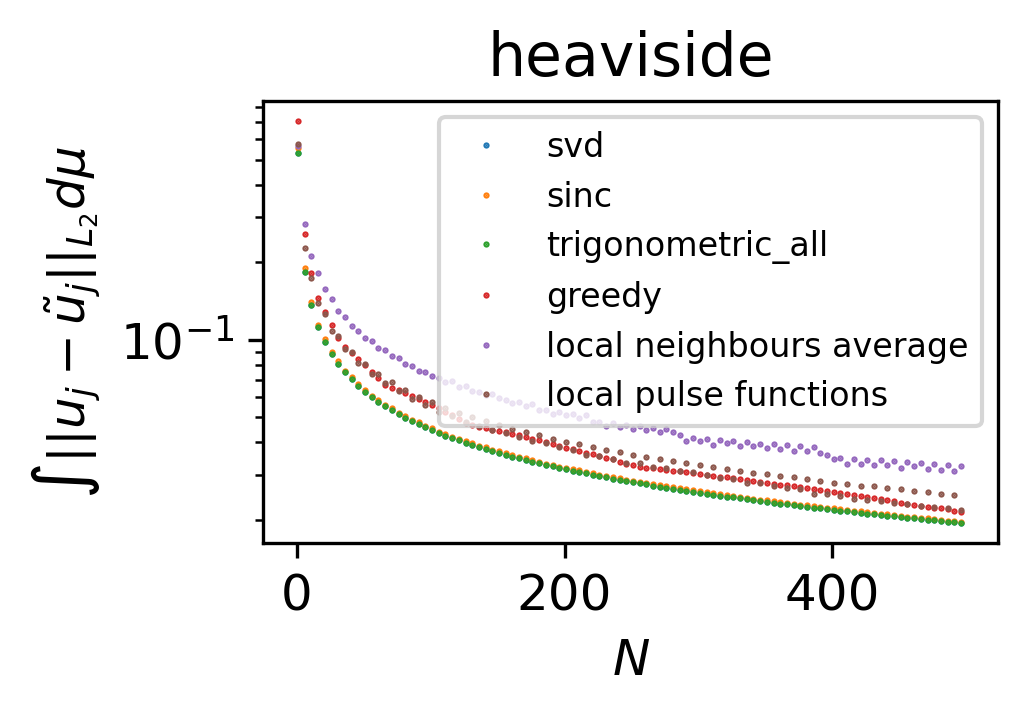

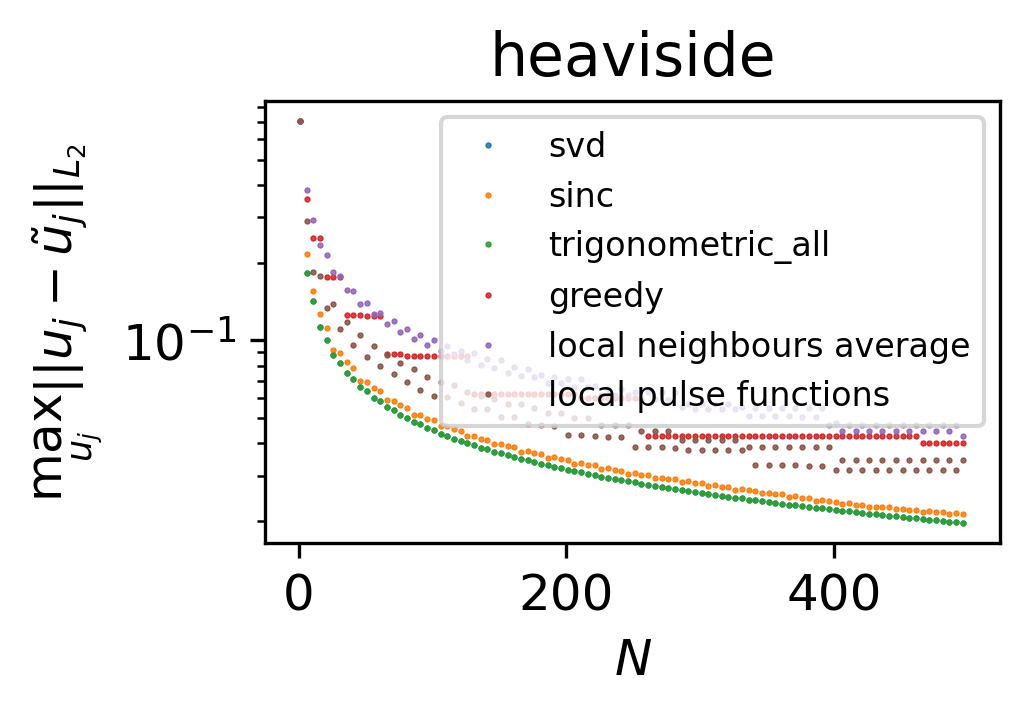

smooth ramp, C^1
$smooth ramp, C^1$
$\int_E_n(u(\mu;x)) d\mu$


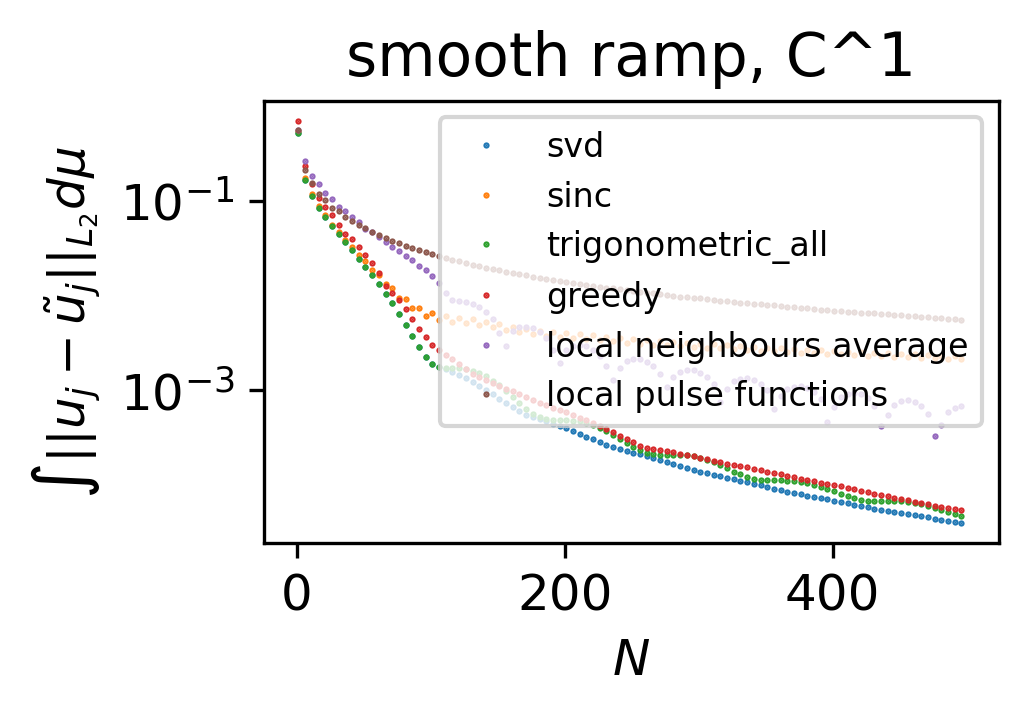

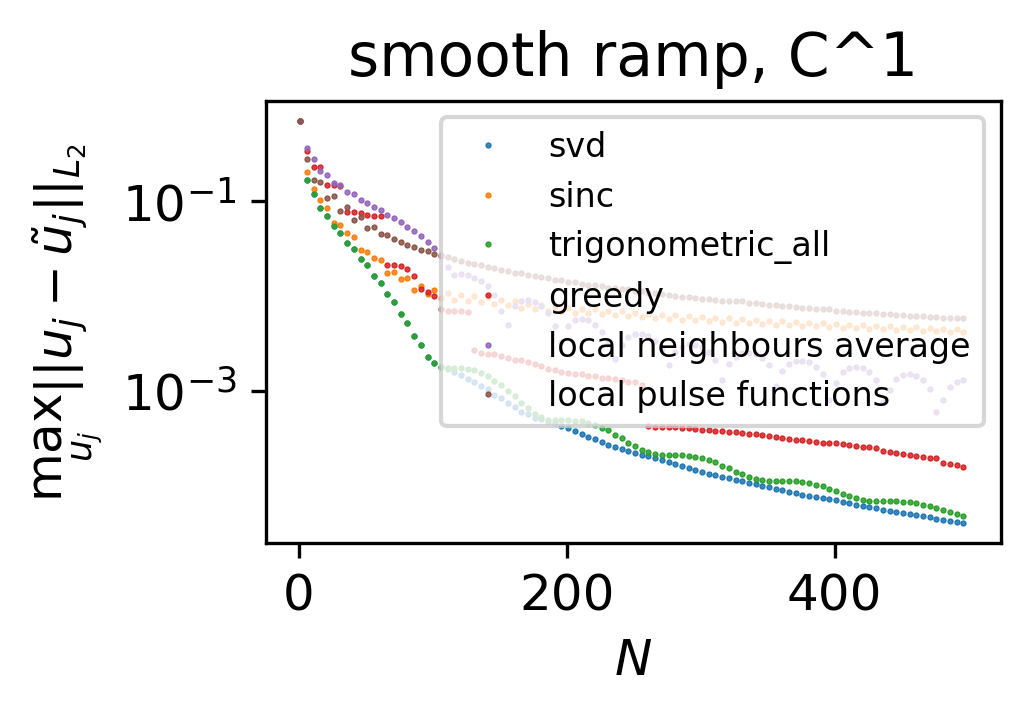

smooth ramp, C^1
$smooth ramp, C^1$
$\int_E_n(u(\mu;x)) d\mu$


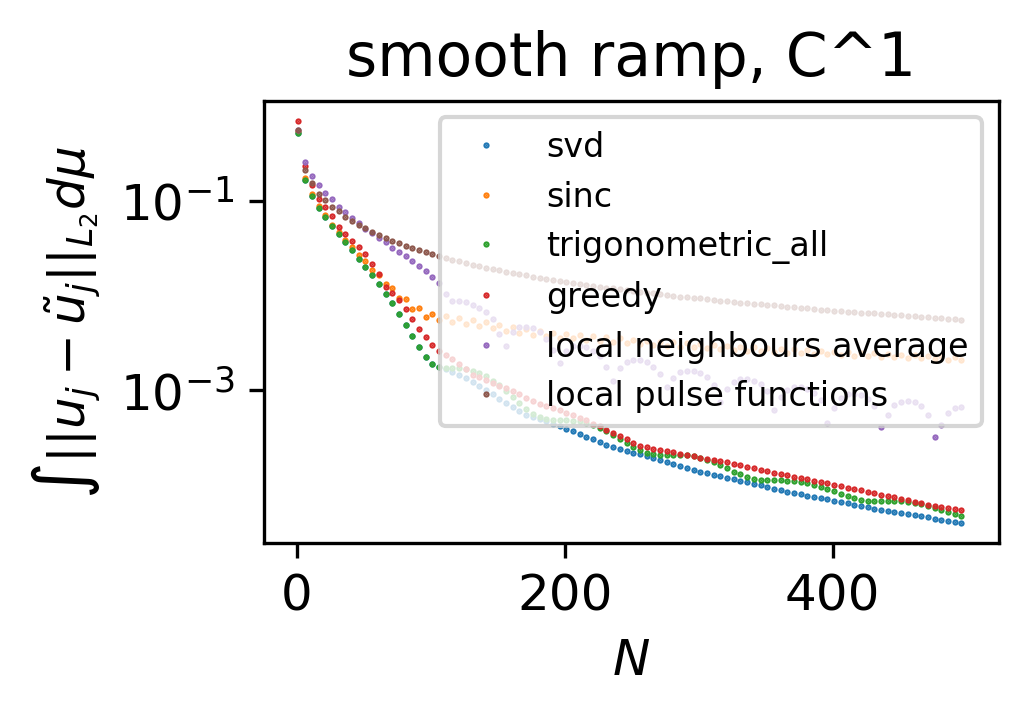

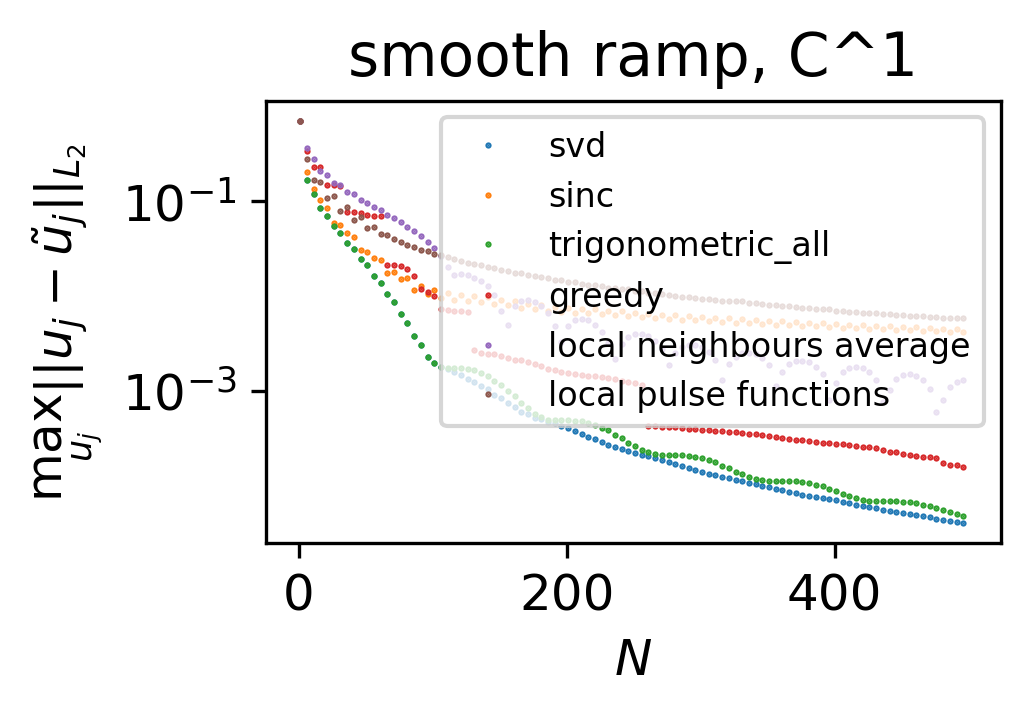

smooth ramp, C^2
$smooth ramp, C^2$
$\int_E_n(u(\mu;x)) d\mu$


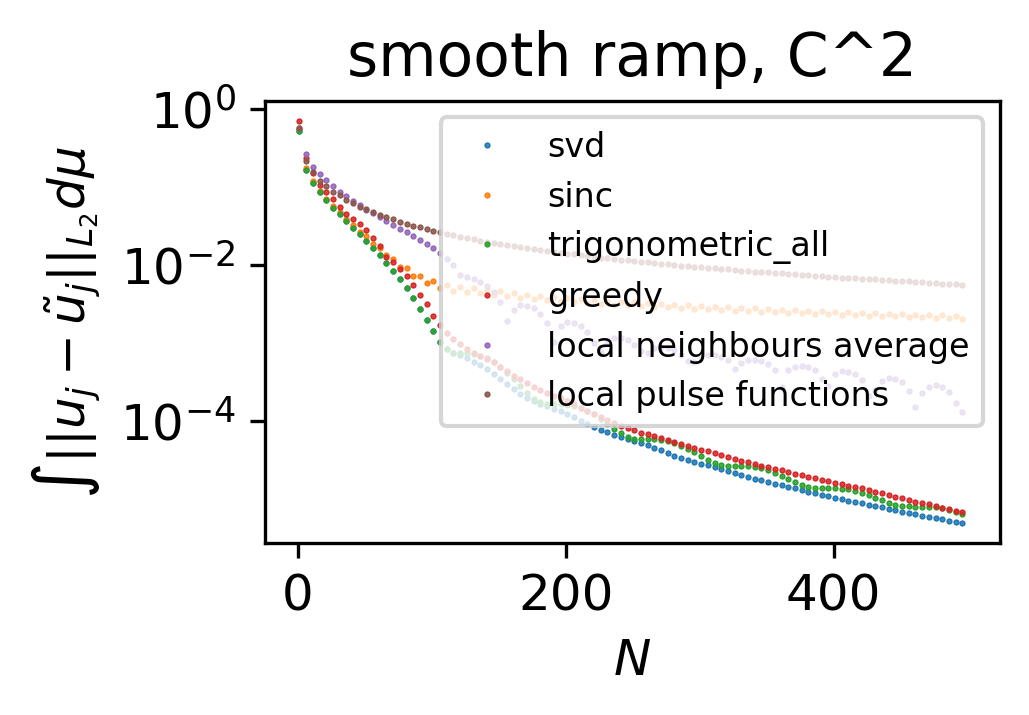

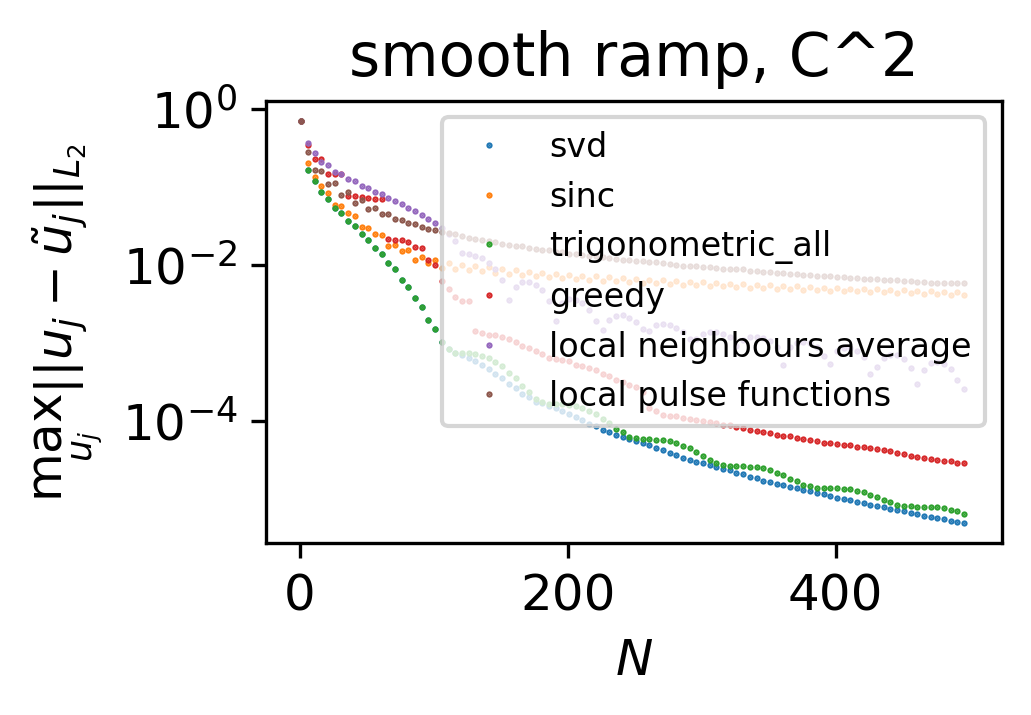

smooth ramp, C^3
$smooth ramp, C^3$
$\int_E_n(u(\mu;x)) d\mu$


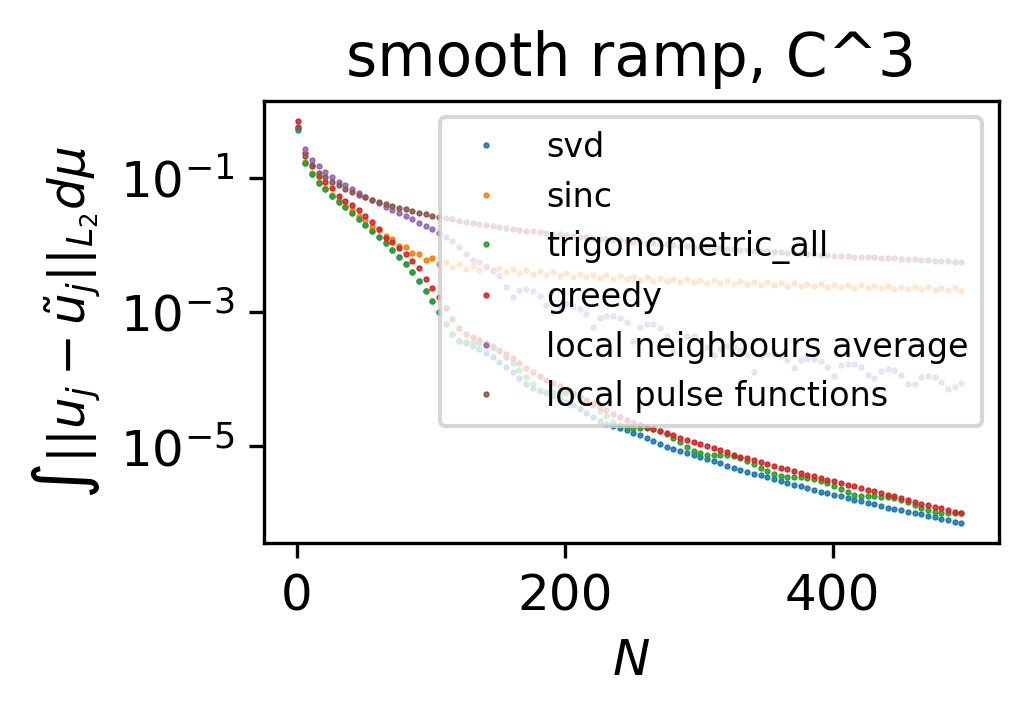

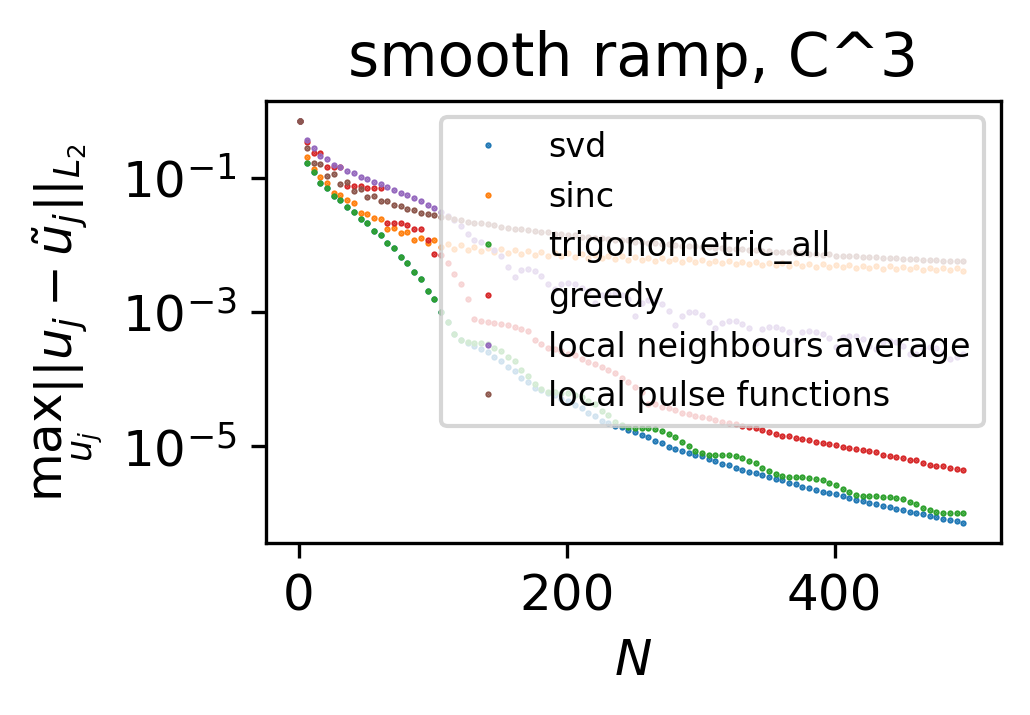

smooth ramp, C^4
$smooth ramp, C^4$
$\int_E_n(u(\mu;x)) d\mu$


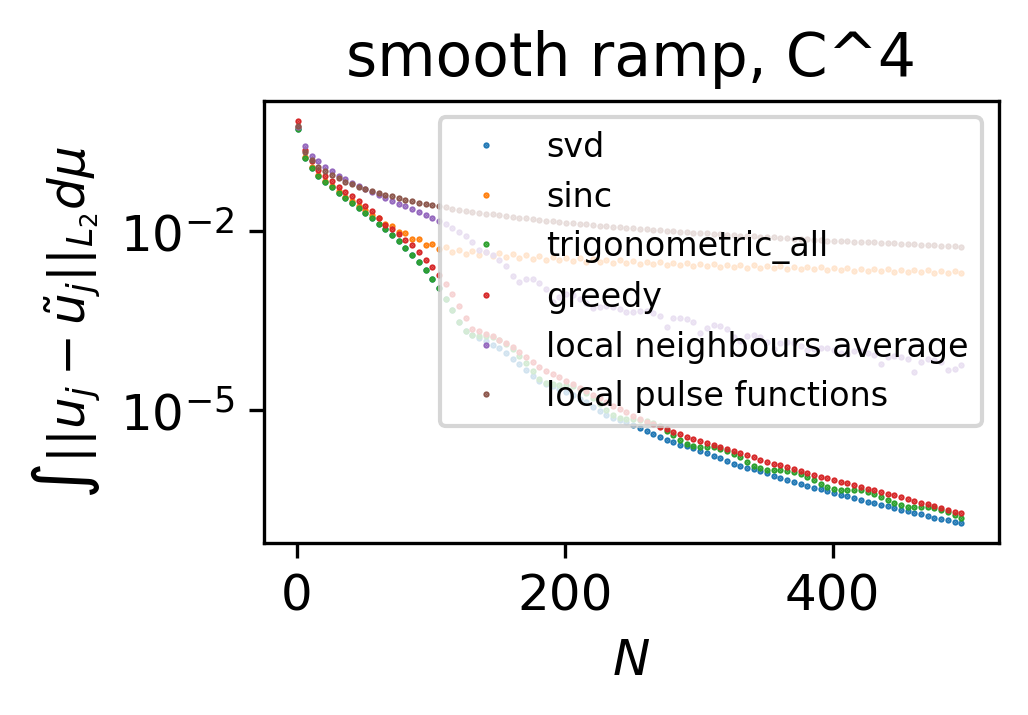

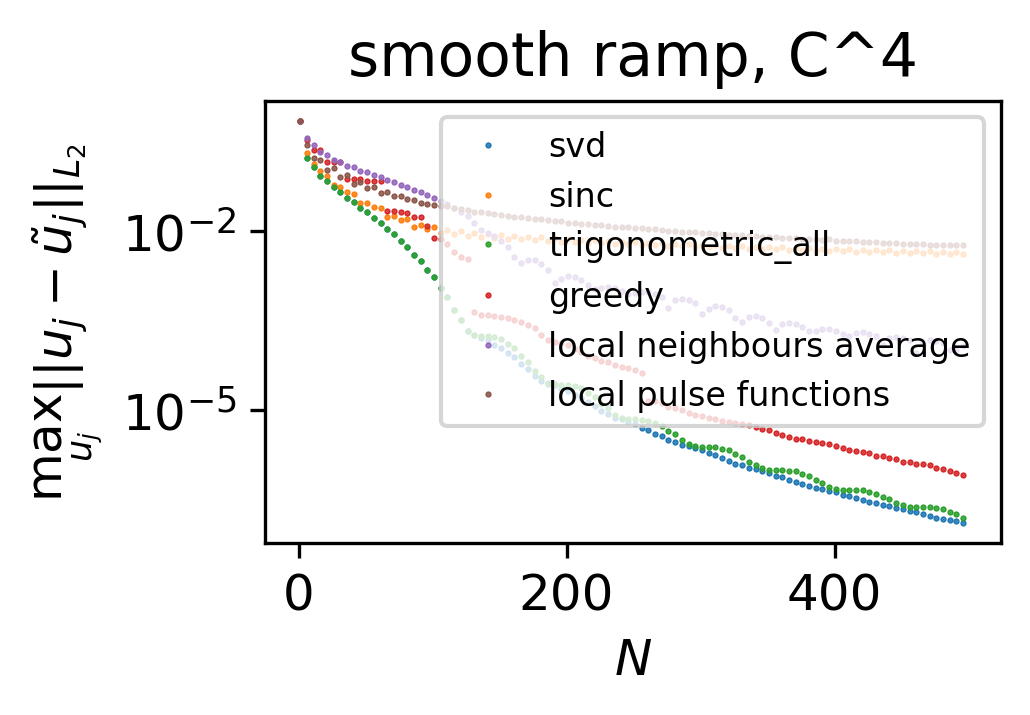

smooth ramp, C^5
$smooth ramp, C^5$
$\int_E_n(u(\mu;x)) d\mu$


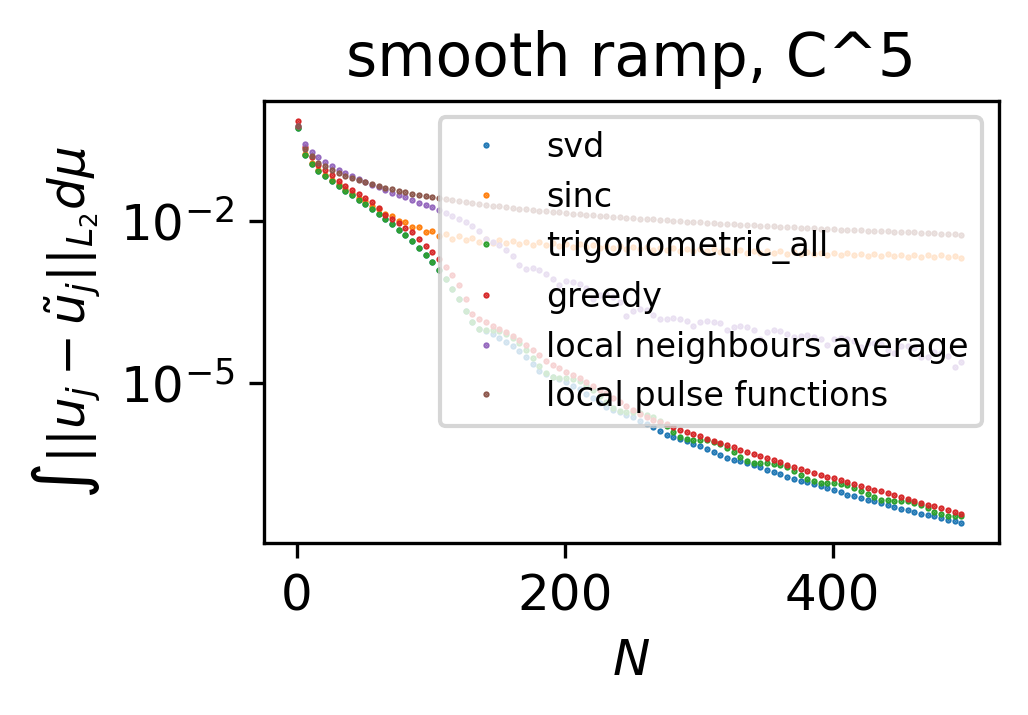

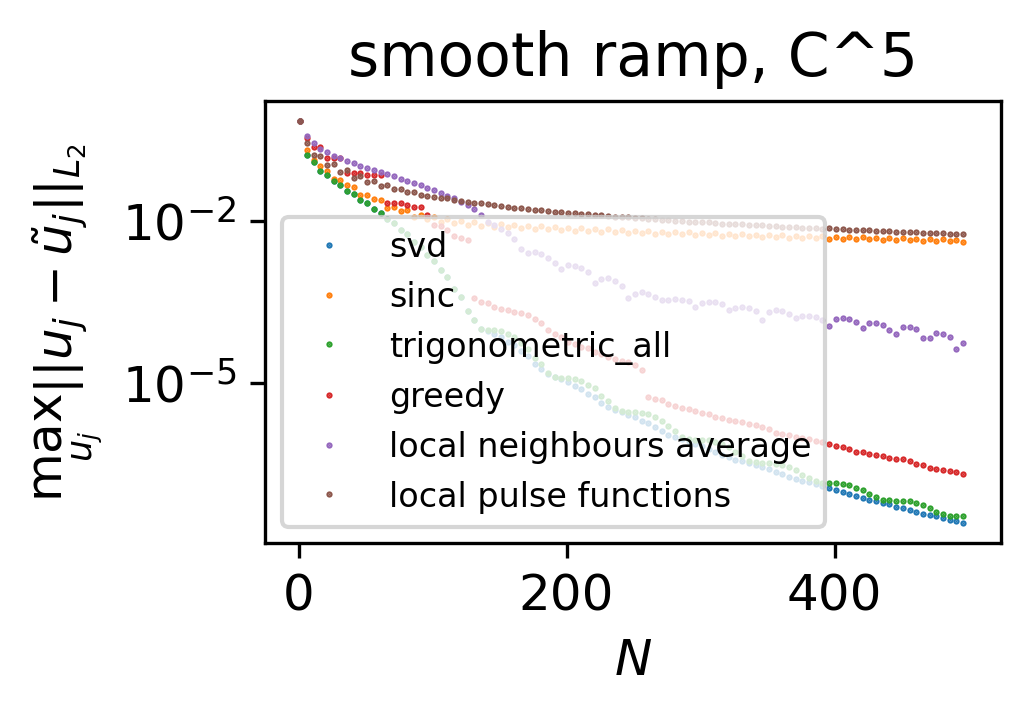

sigmoid
$sigmoid$
$\int_E_n(u(\mu;x)) d\mu$


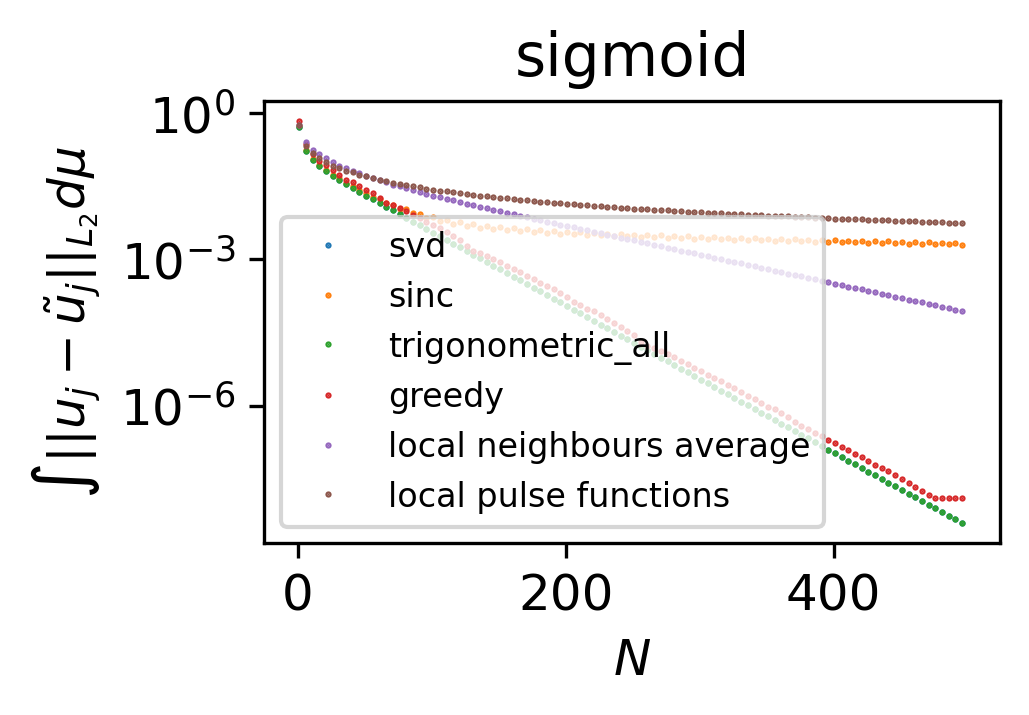

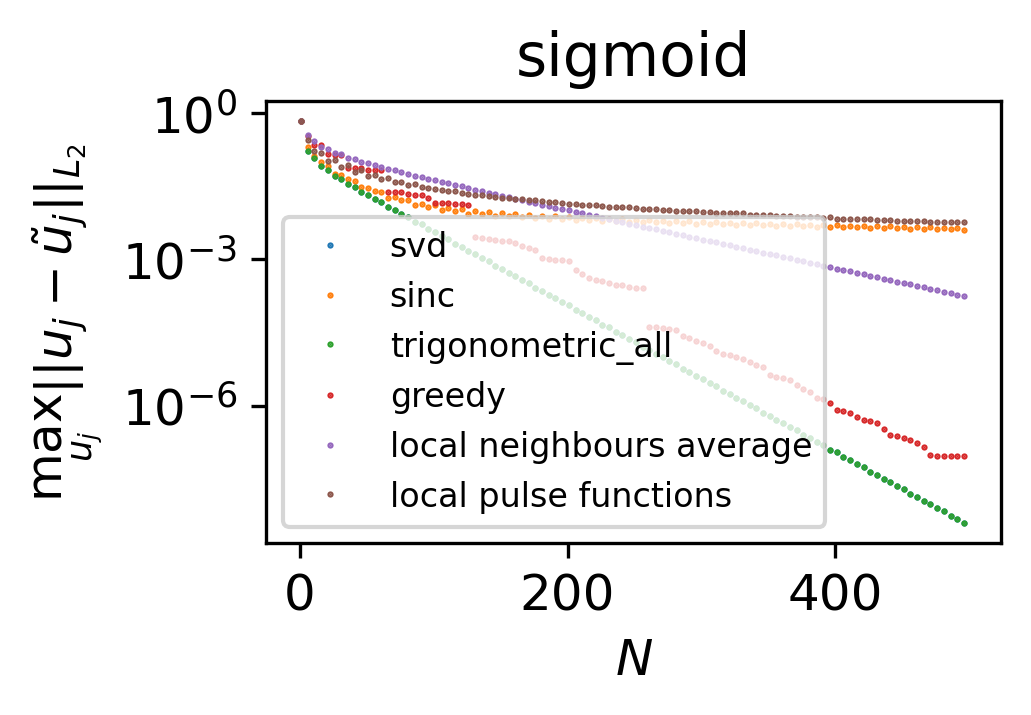

In [11]:
for j, ic in enumerate(initc):
    print(ic.name)
    print(r'$'+ic.name+'$')
    print(r'$\int_E_n(u(\mu;x)) d\mu$')
    
    fig, ax = plt.subplots()
    for i, bv in enumerate(basis_all):
        ax.plot(results[i][j][0], ".", ms=1, label=bv.name)
    ax.set_yscale('log')
    plt.title(ic.name)
    plt.legend(prop={'size': 8})
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\int || u_j - \tilde{u}_j ||_{L_2} d\mu$')
    plt.show()
    
    fig, ax = plt.subplots()
    for i, bv in enumerate(basis_all):
        ax.plot(results[i][j][1], ".", ms=1, label=bv.name)
    ax.set_yscale('log')
    plt.title(ic.name)
    plt.legend(prop={'size': 8})
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\max_{u_j} || u_j - \tilde{u}_j ||_{L_2} $')
    plt.show()
    

In [12]:
print(results.shape)
print(initc)
print(basis_all)

(6, 9, 4, 500)
[<initial_conditions.Heaviside object at 0x000002B11E947550>, <initial_conditions.CkRamp object at 0x000002B11E9475B0>, <initial_conditions.CkRamp object at 0x000002B11E9474F0>, <initial_conditions.CkRamp object at 0x000002B11F07EBE0>, <initial_conditions.CkRamp object at 0x000002B11F07EC10>, <initial_conditions.CkRamp object at 0x000002B11F07EBB0>, <initial_conditions.CkRamp object at 0x000002B11F07EB80>, <initial_conditions.Sigmoid object at 0x000002B11F07EC40>]
[<basis_functions.SVD object at 0x000002B11EB98340>, <basis_functions.Sinc object at 0x000002B11EAEAD90>, <basis_functions.TrigonometricAll object at 0x000002B11E9404C0>, <basis_functions.Greedy object at 0x000002B11EB1C460>, <basis_functions.LNA object at 0x000002B11EB1C310>, <basis_functions.LPF object at 0x000002B11EB1C340>]


svd


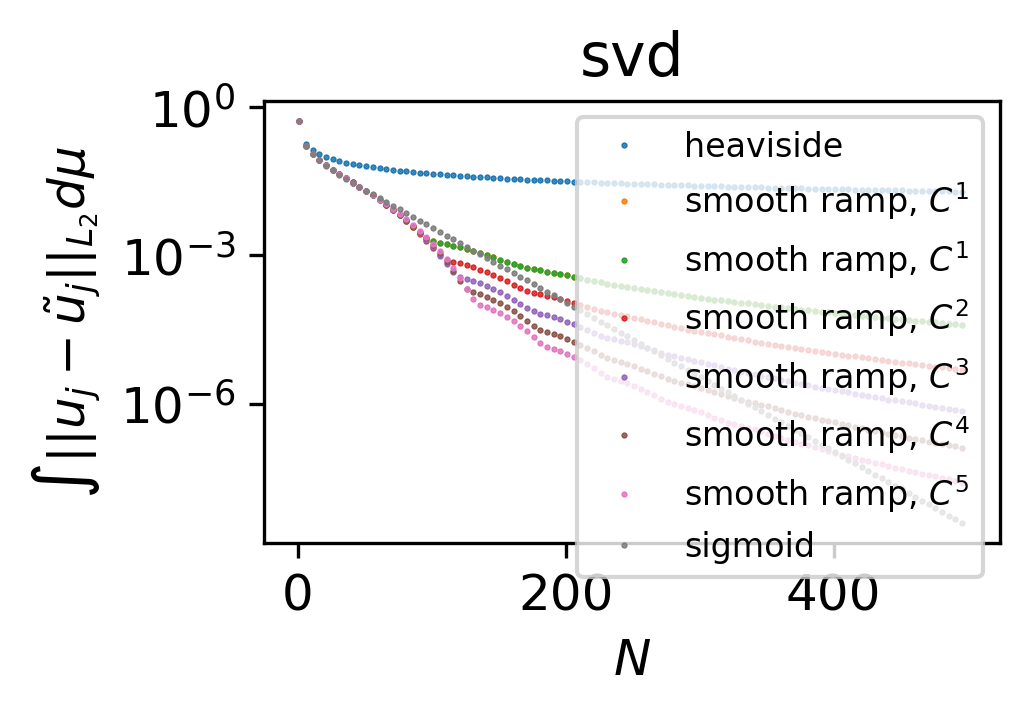

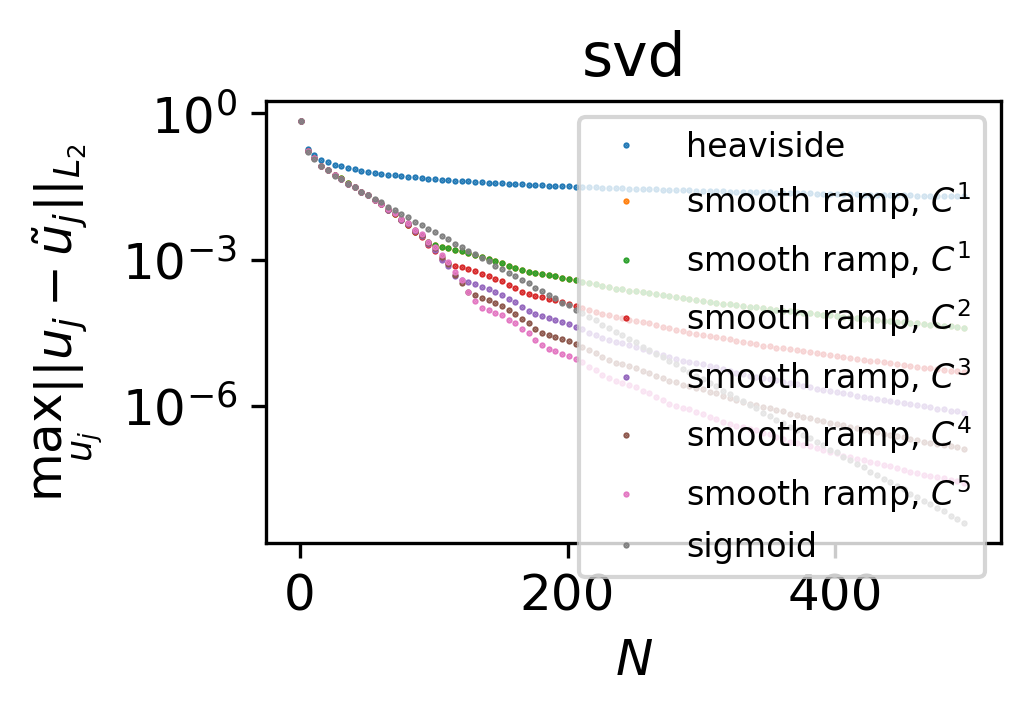

sinc


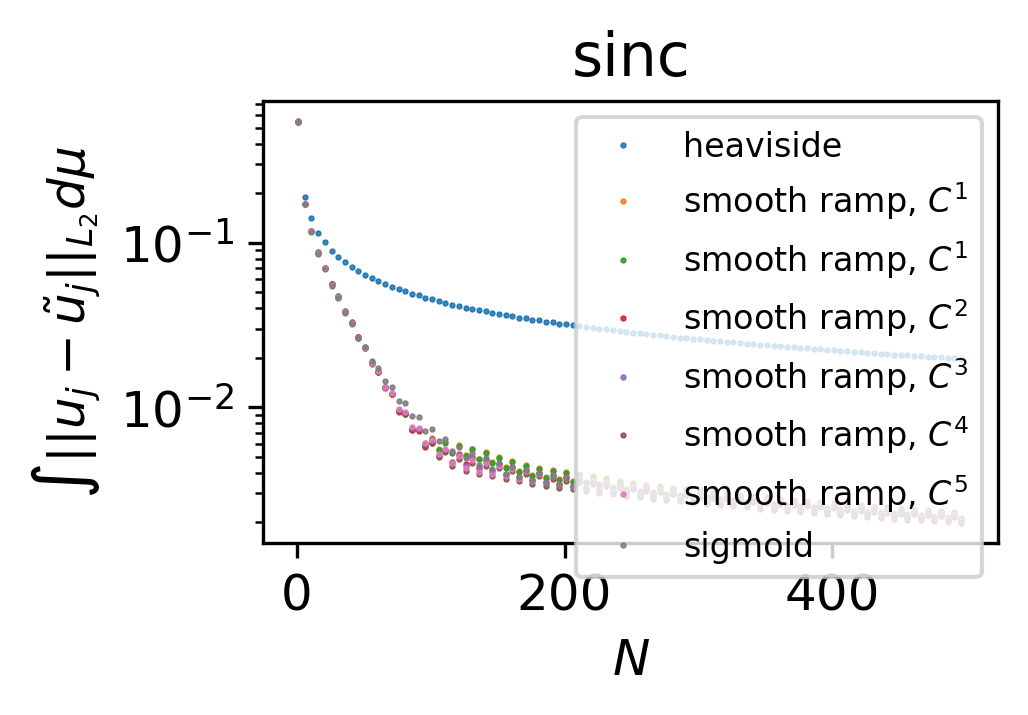

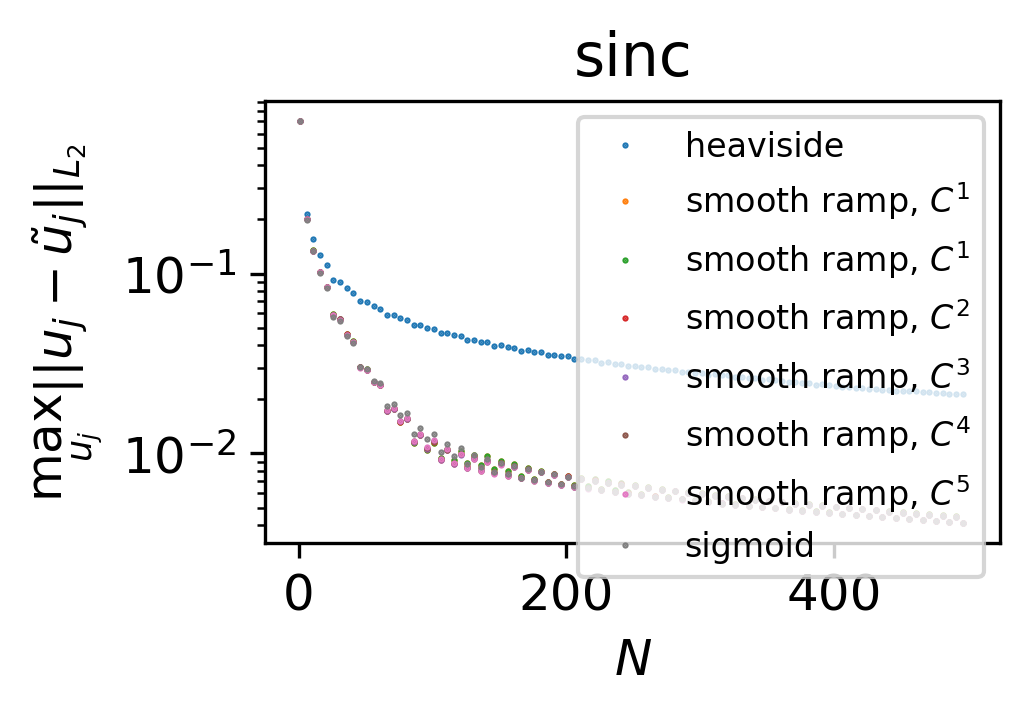

trigonometric_all


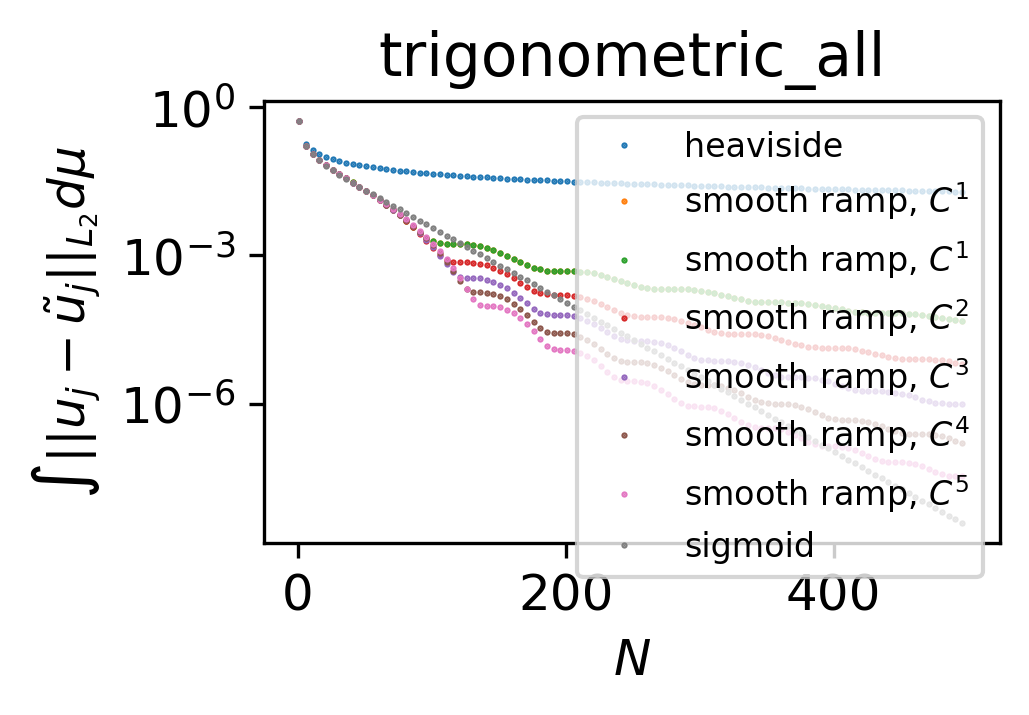

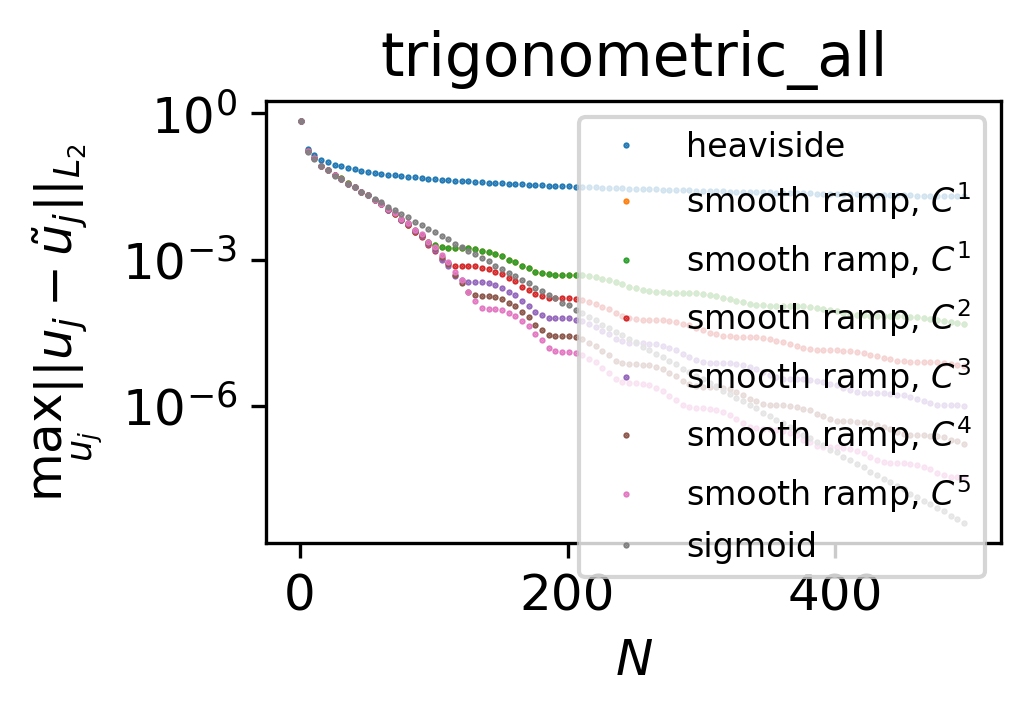

greedy


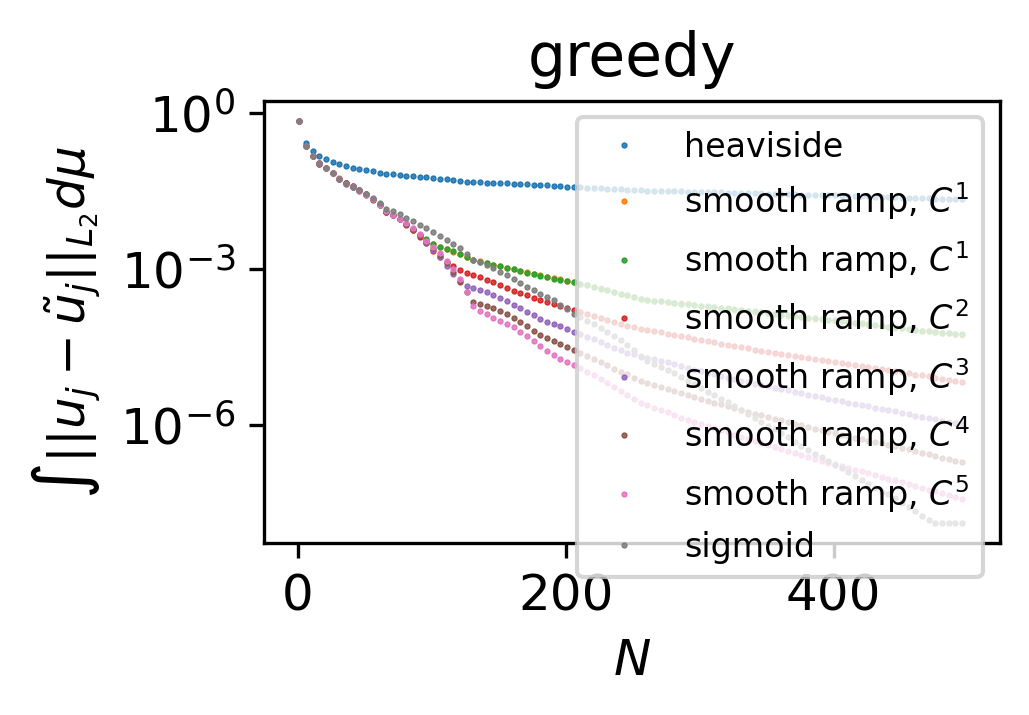

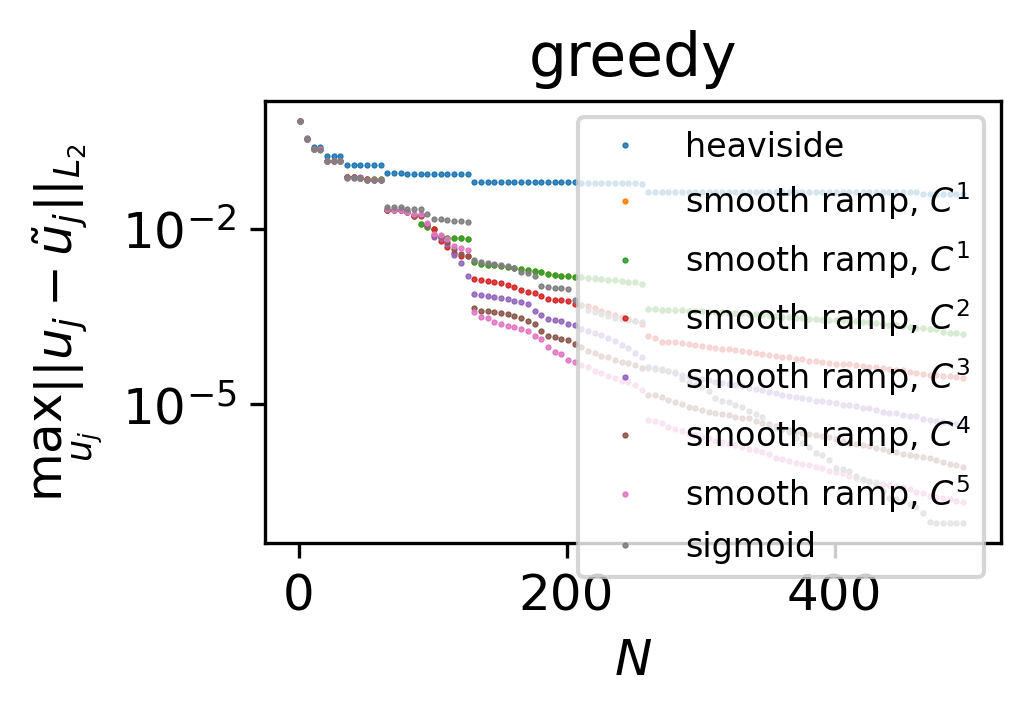

local neighbours average


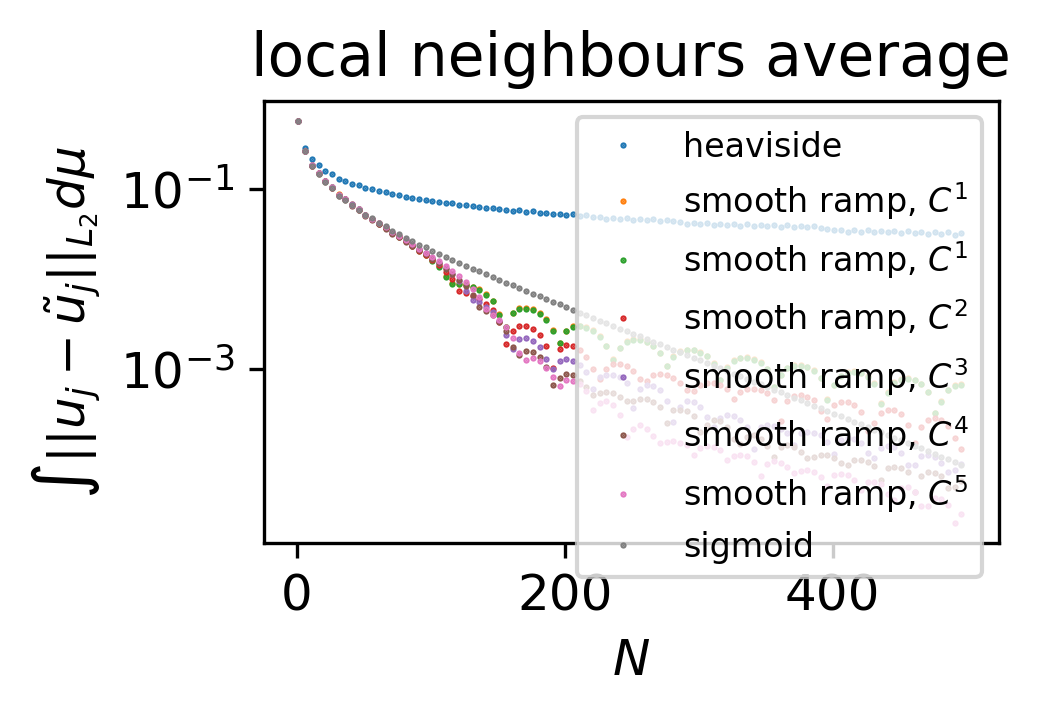

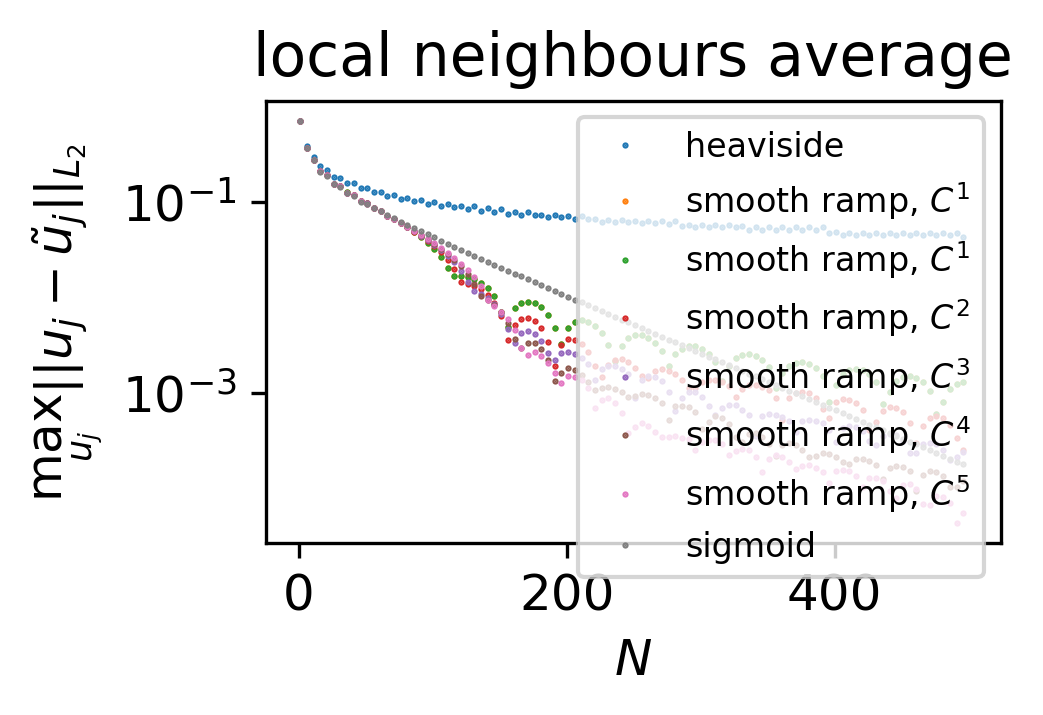

local pulse functions


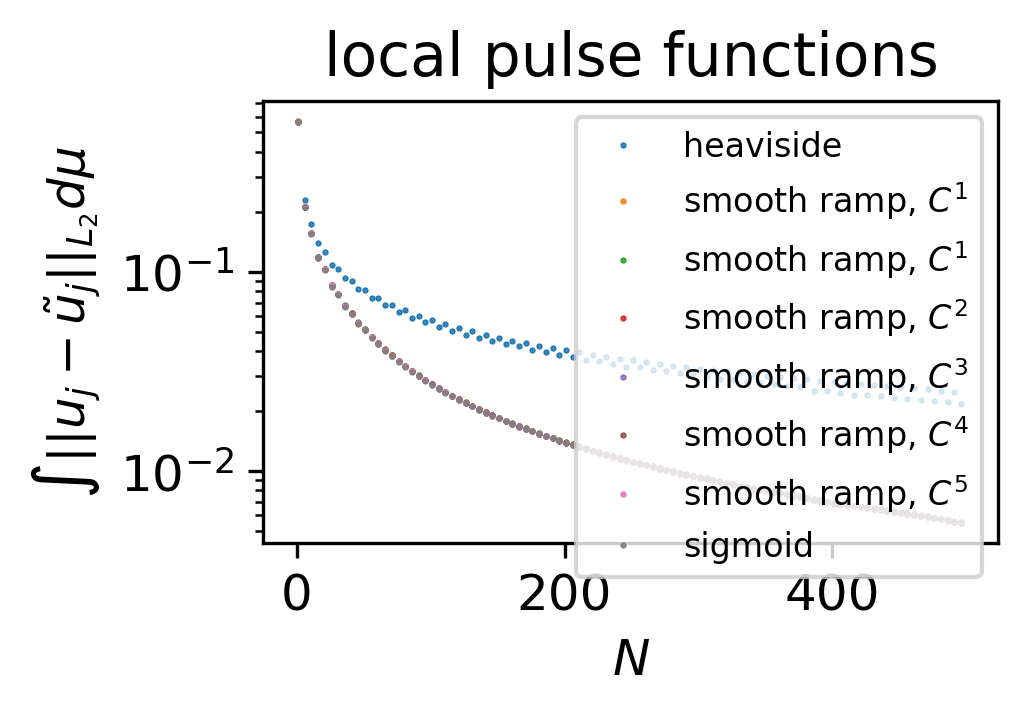

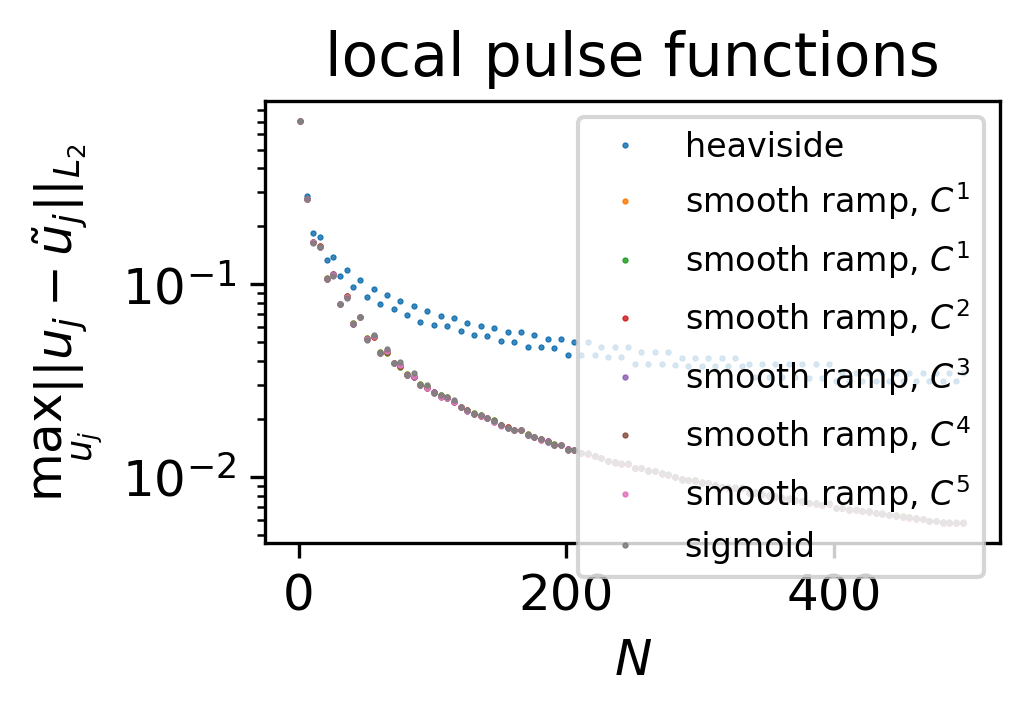

In [13]:
for i, bv in enumerate(basis_all):
    print(bv.name)
    
    fig, ax = plt.subplots()
    for j, ic in enumerate(initc):
        lbl = ic.name
        if ic.name[-1].isdigit():
            lbl = ic.name[:-3]+'$'+ic.name[-3:]+'$'
        ax.plot(results[i][j][0], ".", ms=1, label=lbl)
    ax.set_yscale('log')
    plt.title(bv.name)
    plt.legend(prop={'size': 8})
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\int || u_j - \tilde{u}_j ||_{L_2} d\mu$')
    plt.show()
    
    fig, ax = plt.subplots()
    for j, ic in enumerate(initc):
        lbl = ic.name
        if ic.name[-1].isdigit():
            lbl = ic.name[:-3]+'$'+ic.name[-3:]+'$'
        ax.plot(results[i][j][1], ".", ms=1, label=lbl)
    ax.set_yscale('log')
    plt.title(bv.name)
    plt.legend(prop={'size': 8})
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\max_{u_j} || u_j - \tilde{u}_j ||_{L_2} $')
    plt.show()

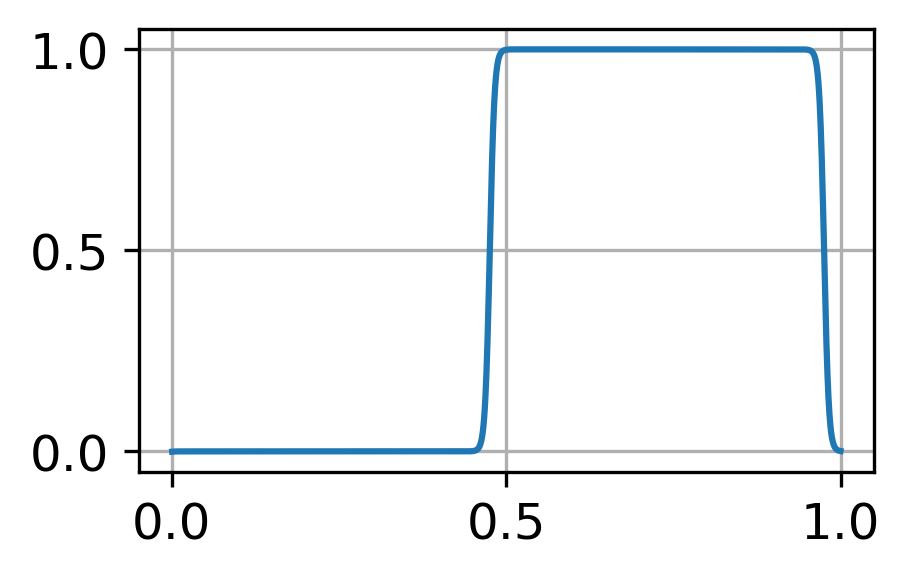

IndexError: index 2000 is out of bounds for axis 1 with size 2000

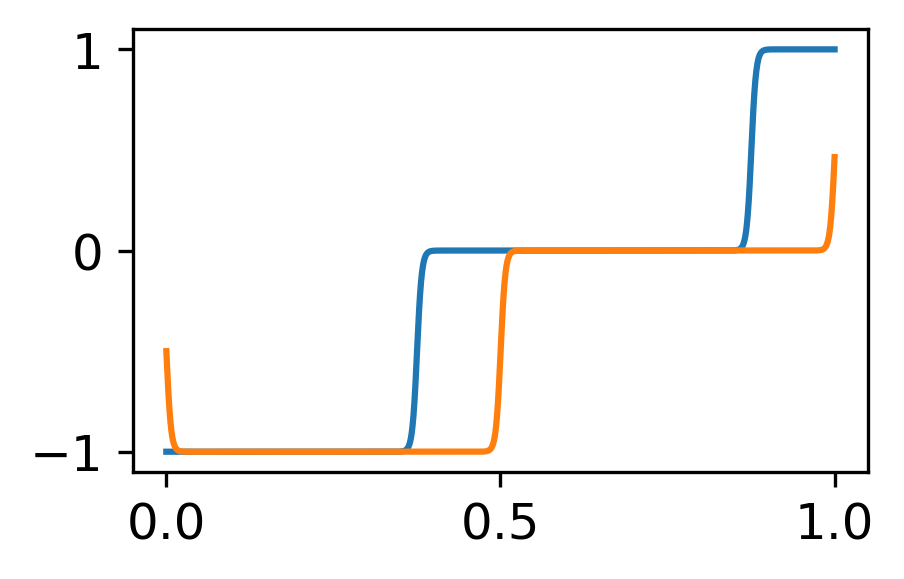

In [14]:
fig, ax = plt.subplots()
for i in [450]:
    plt.plot(x(), X[:, i])
plt.grid()
plt.show()
fig, ax = plt.subplots()
for i in [1250, 1500, 2000]:
    plt.plot(x(), X[:, i])
plt.show()

In [ ]:
mu_plot = np.array([0, .25, .5, 0.75, 1])
X = u_k.half_wave_odd(x(), mu_plot)
# [-inf ... -1.0]:  g(x) = 0.0
# [-1.0 ... -0.5]:  g(x) = -f(x)
# [-0.5 ... -0.0]:  g(x) = -(1-f(x))
#  [0.0 ...  0.5]:  g(x) = f(x)
#  [0.5 ...  1.0]:  g(x) = 1-f(x)
#  [1.0 ...  inf]:  g(x) = 0.0

In [ ]:
i = 250
for i, xx in enumerate(mu_plot):
    T = 2
    #xx = mu()[i]
    fig, ax = plt.subplots()
    plt.plot(x(), X[:, i])
    plt.plot([xx, xx], [-1, 1], "r--", label="x=mu")
    plt.plot([xx-T/8, xx-T/8], [-1, 1], "k--", lw=.5, label="original intervall")
    plt.plot([xx+T/8, xx+T/8], [-1, 1], "k--", lw=.5)
    for j in [1, 3, 5, 7, 9, 11, 13]:
        plt.plot([xx+T*j/8, xx+T*j/8], [-1, 1], "k--", lw=.5)
        plt.plot([xx-T*j/8, xx-T*j/8], [-1, 1], "k--", lw=.5)
    plt.plot([xx+T/4, xx+T/4], [-1, 1], "g--")
    plt.plot([xx+T/2, xx+T/2], [-1, 1], "b--")
    plt.plot([xx-T/4, xx-T/4], [-1, 1], "g--", label="mu+-T/4")
    plt.plot([xx-T/2, xx-T/2], [-1, 1], "b--", label="mu+-T/2")
    plt.xlim([-1, 1])
    plt.legend(prop={'size': 6})
    plt.grid()

